In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Orders/RandomForest.csv', error_bad_lines=False, sep=";", encoding='mac_roman')
df

<ipython-input-40-10839e1b8908>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/Orders/RandomForest.csv', error_bad_lines=False, sep=";", encoding='mac_roman')


,Unnamed: 0,ID,Name,City,State,Address,isCOD,Date_Placed,Status,IVR,Total,Date Delivered,Date Returned,PID,Category,Quantity,Product Name
0,0,30145,Man,Nayagarh,Odisha,"Jagadish Prasad, Golapokhari-Bhapur Road, Fate...",True,31/01/2021 17:45,Delivered,Confirmed,999,14/02/2021 4:37,NaN,32,WL,2,One Week Weight-Loss (Peach)
1,17,30123,Vic,Ludhiana,Punjab,Barewal Awana Near magnet road mahavir enclave,True,31/01/2021 14:35,Returned,Confirmed,3596,NaN,13/02/2021 6:55,34,WL,2,One Month Weight-Loss (Peach)
2,1272,28153,Sre,Thrissur,Kerala,"Chembukkattu Illom, Cheruvaloor P O Near cheru...",True,08/01/2021 10:30,Returned,Confirmed,1998,NaN,18/01/2021 20:21,32,WL,2,One Week Weight-Loss (Peach)
3,1546,27705,Nuf,Thrissur,Kerala,"Yakkeery house, Pannithadam , Chiramenenghade...",True,02/01/2021 1:39,Delivered,Confirmed,599,09/01/2021 6:40,NaN,23,D,1,One Week Detox Trial
4,1547,27704,Gul,Rewa,Madhya Pradesh,218/30 purani aabkari tarahti rewa mp,True,02/01/2021 1:34,Returned,Confirmed,599,NaN,16/01/2021 6:32,23,D,1,One Week Detox Trial
5,1558,27687,Jee,Ludhiana,Punjab,"Jeena Saharan , Home no.3 , COUNTRY HOMES EAST...",True,01/01/2021 16:32,Delivered,Confirmed,1724,06/01/2021 11:51,NaN,24,D,1,One Month Detox
6,1559,27686,Har,Tiruchirappalli,Tamil Nadu,"25, tennur high road,tennur",True,01/01/2021 16:20,Delivered,Confirmed,2780,08/01/2021 6:41,NaN,52,K,1,One Month Keto Booster
7,1560,27684,Shr,Bangalore,Karnataka,11th cross Balaji nagar. Thigalarapalya main road,True,01/01/2021 15:48,Delivered,Confirmed,599,07/01/2021 13:30,NaN,23,D,1,One Week Detox Trial
8,1561,27683,Ais,East Godavari,Andhra Pradesh,"B2,ullithota street,rajahmundry",True,01/01/2021 15:40,Delivered,Confirmed,799,10/01/2021 6:35,NaN,32,WL,1,One Week Weight-Loss (Peach)
9,1582,27645,Man,Rohtak,Haryana,Gohana mod meham Rohtak Haryana,True,01/01/2021 5:25,Returned,Confirmed,2517,NaN,15/01/2021 10:07,34,WL,1,One Month Weight-Loss (Peach)


In [ ]:
columns_using = ['isCOD', 'Total']
X = df[columns_using]
y = df[['Status']]

In [ ]:

df['Status'].unique()

array(['Delivered', 'Returned'], dtype=object)

In [ ]:
df['Status'].value_counts()

Delivered    6
Returned     4
Name: Status, dtype: int64

In [ ]:
df['Status'].value_counts()/len(df)

Delivered    0.6
Returned     0.4
Name: Status, dtype: float64

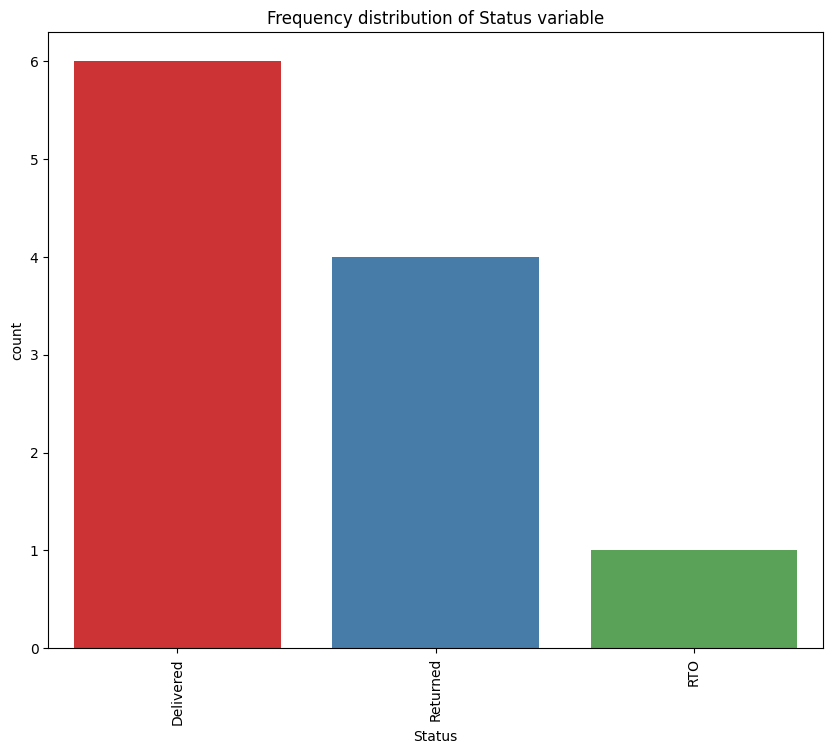

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Status", data=df, palette="Set1")
ax.set_title("Frequency distribution of Status variable")
ax.set_xticklabels(df.Status.value_counts().index, rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

<ipython-input-45-02583e4cbe1f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.3333


<ipython-input-46-8a068a59ea3a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


<ipython-input-47-864ec391bcbd>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_3.fit(X_train, y_train)


DecisionTreeClassifier(max_features='sqrt', random_state=209652396)


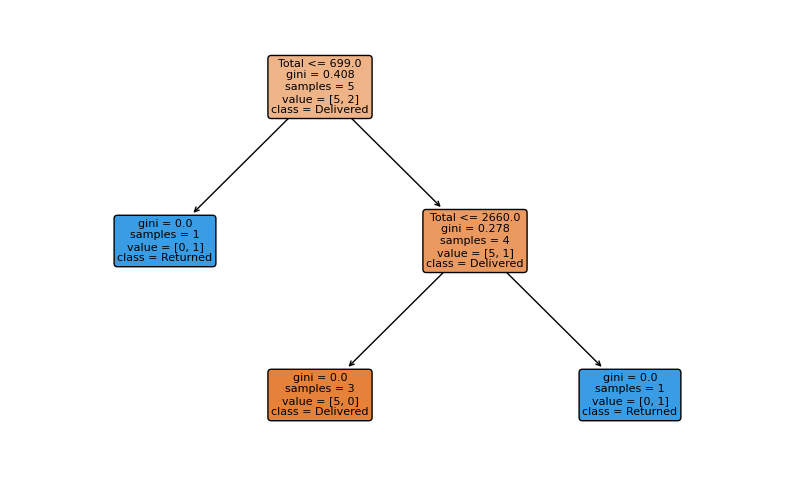

DecisionTreeClassifier(max_features='sqrt', random_state=398764591)


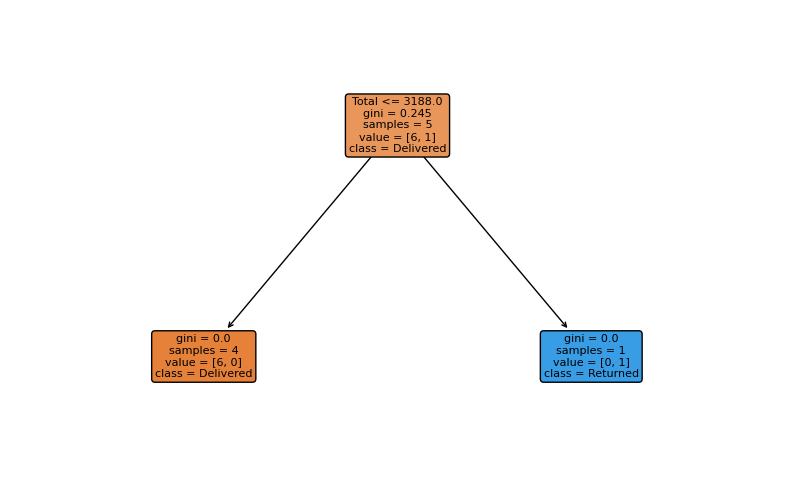

DecisionTreeClassifier(max_features='sqrt', random_state=924231285)


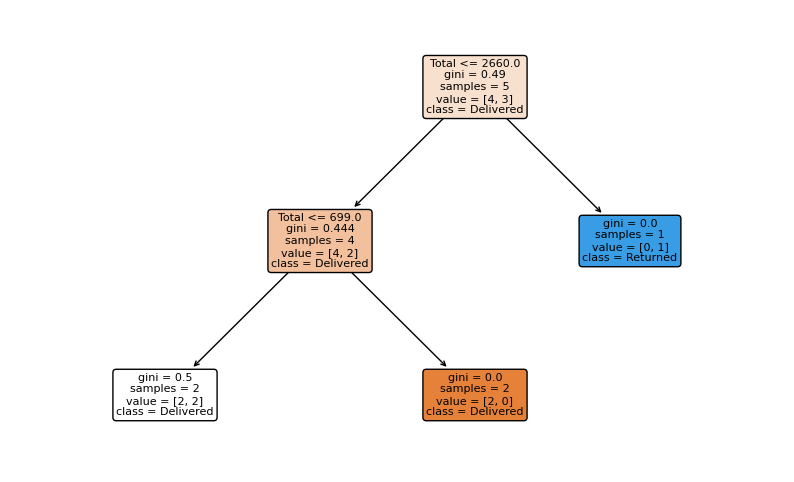

DecisionTreeClassifier(max_features='sqrt', random_state=1478610112)


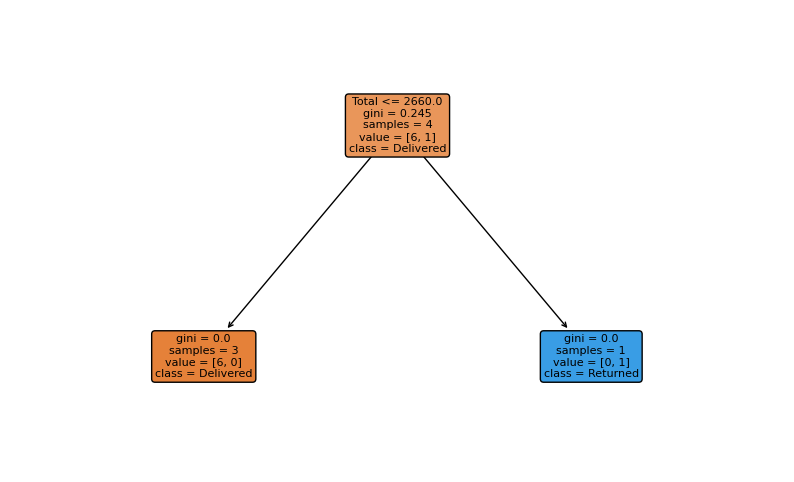

DecisionTreeClassifier(max_features='sqrt', random_state=441365315)


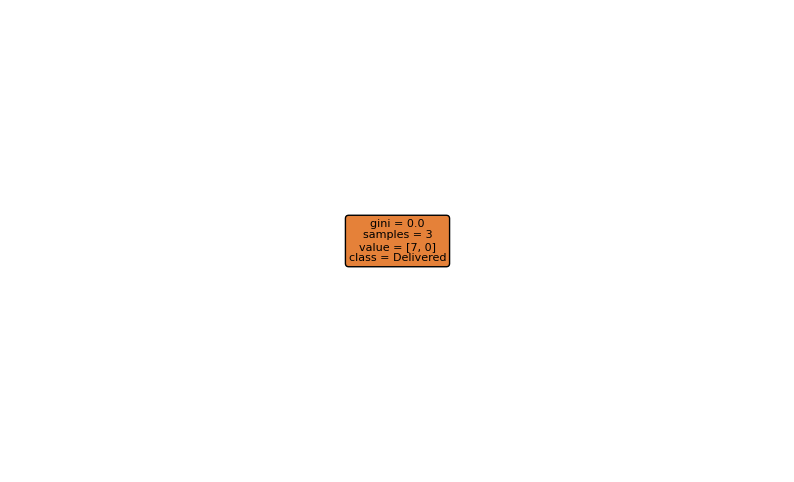

DecisionTreeClassifier(max_features='sqrt', random_state=1537364731)


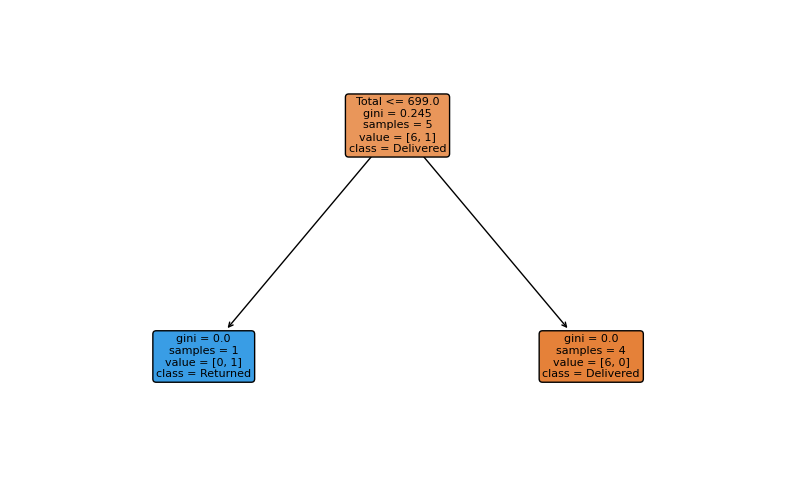

DecisionTreeClassifier(max_features='sqrt', random_state=192771779)


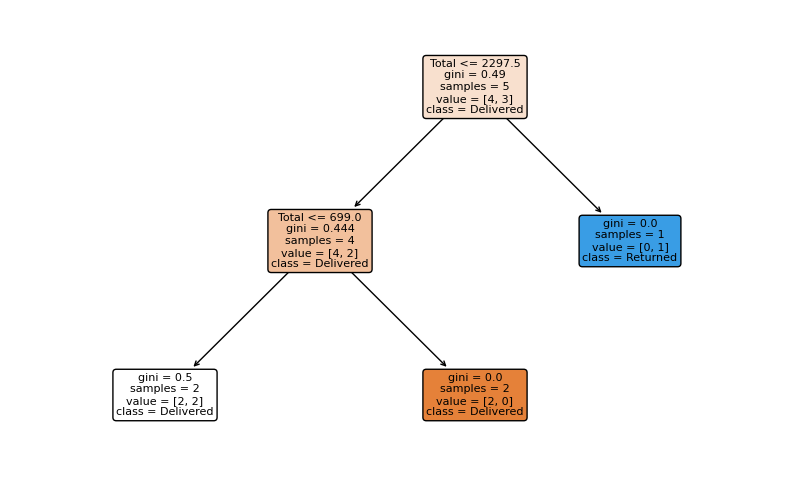

DecisionTreeClassifier(max_features='sqrt', random_state=1491434855)


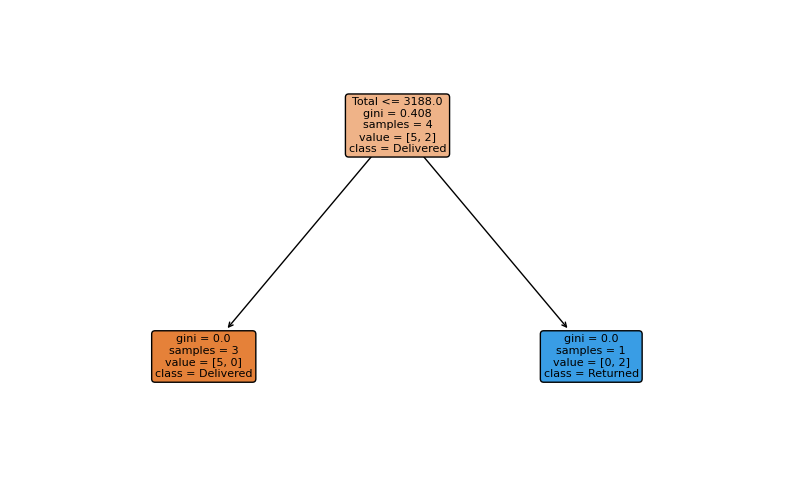

DecisionTreeClassifier(max_features='sqrt', random_state=1819583497)


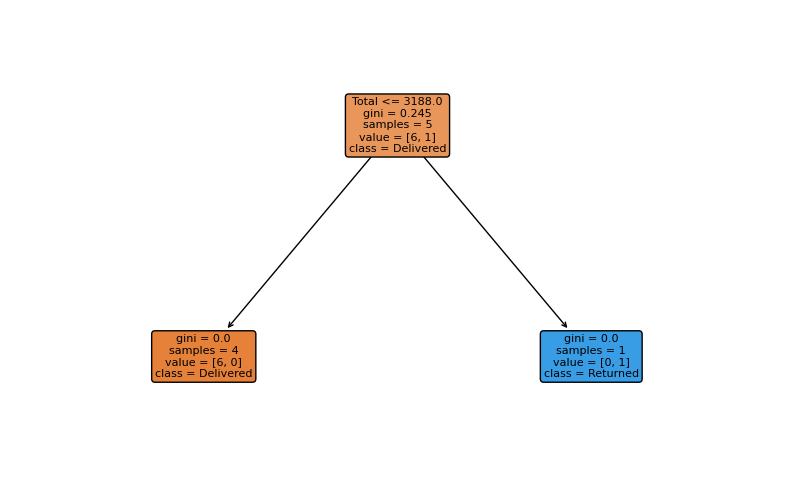

DecisionTreeClassifier(max_features='sqrt', random_state=530702035)


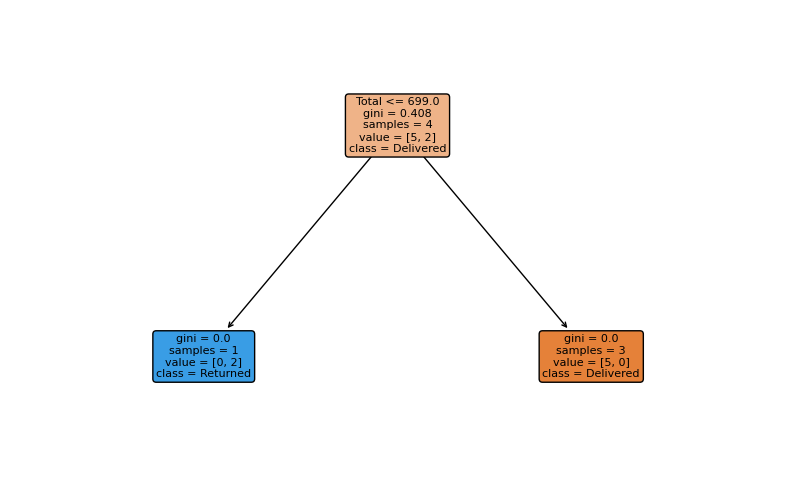

DecisionTreeClassifier(max_features='sqrt', random_state=626610453)


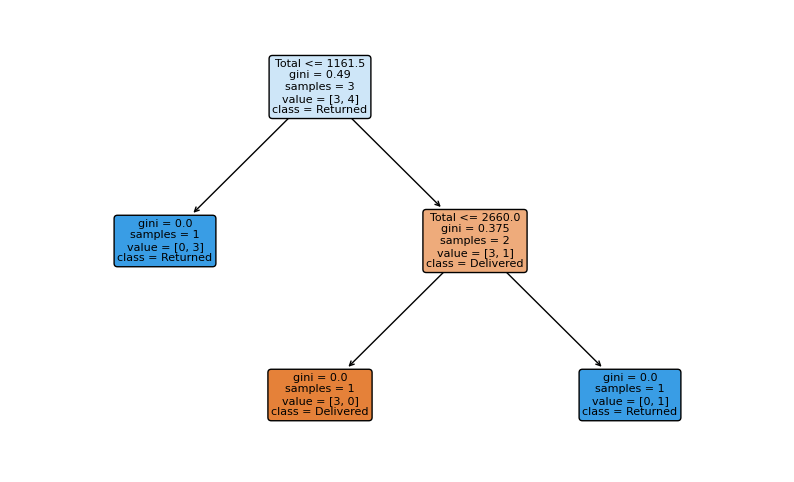

DecisionTreeClassifier(max_features='sqrt', random_state=1650906866)


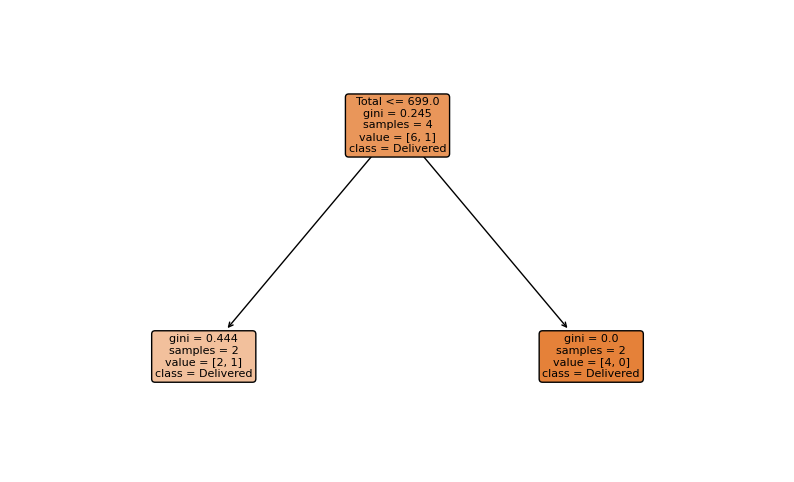

DecisionTreeClassifier(max_features='sqrt', random_state=1879422756)


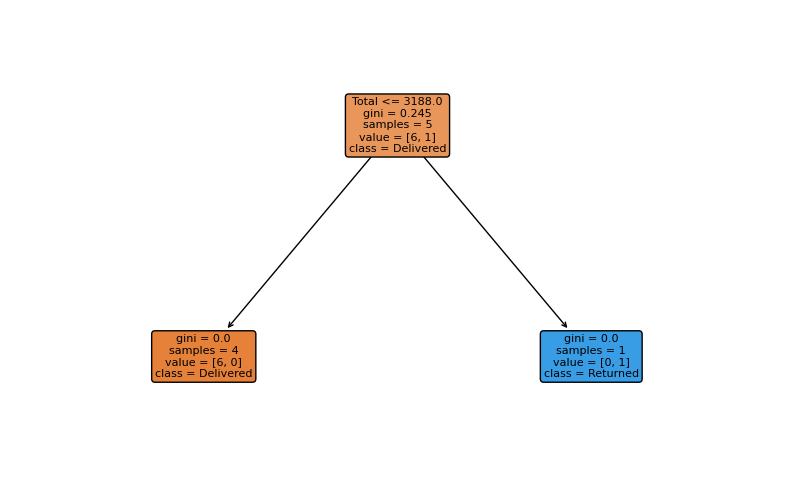

DecisionTreeClassifier(max_features='sqrt', random_state=1277901399)


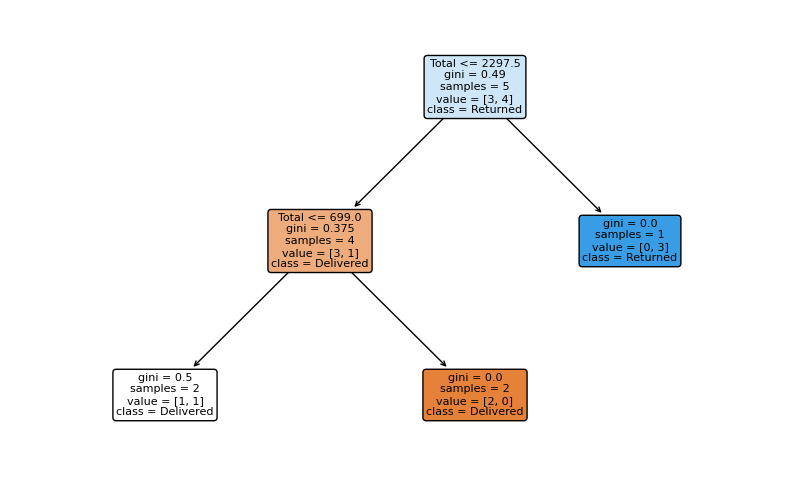

DecisionTreeClassifier(max_features='sqrt', random_state=1682652230)


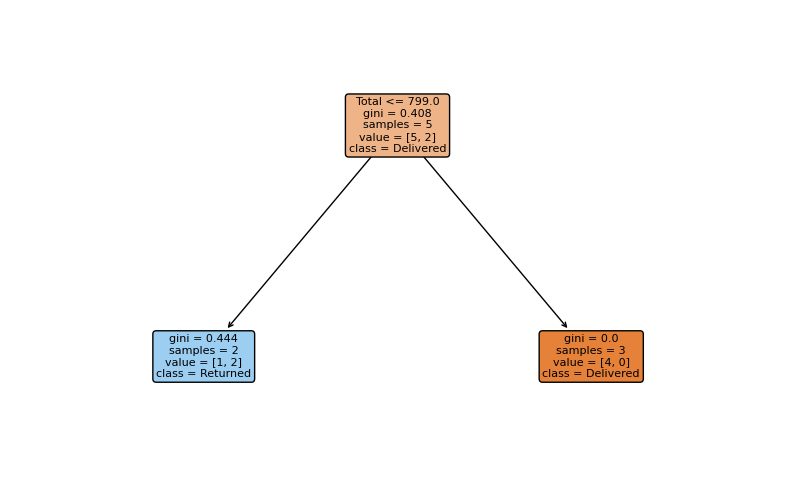

DecisionTreeClassifier(max_features='sqrt', random_state=243580376)


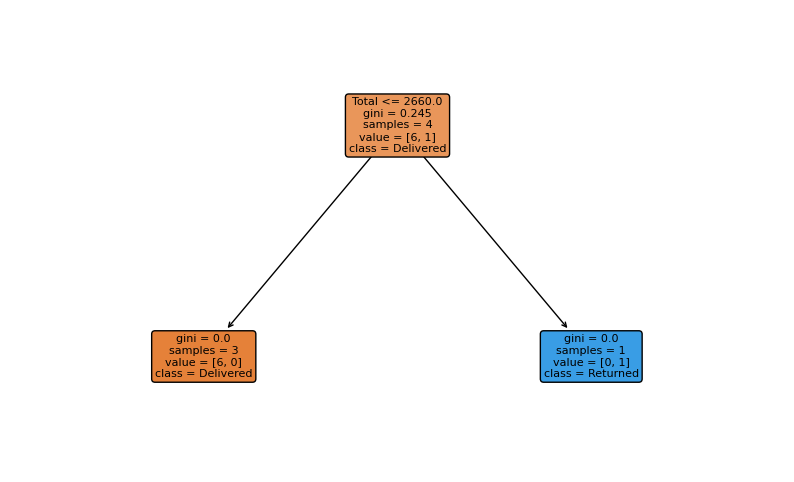

DecisionTreeClassifier(max_features='sqrt', random_state=1991416408)


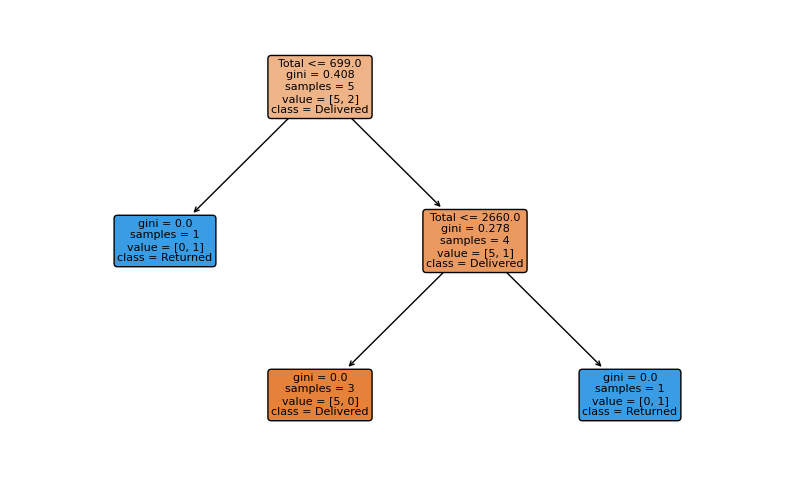

DecisionTreeClassifier(max_features='sqrt', random_state=1171049868)


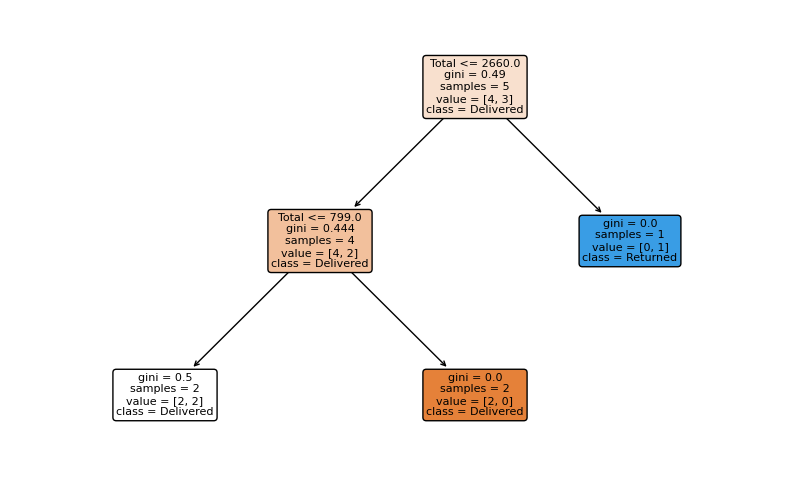

DecisionTreeClassifier(max_features='sqrt', random_state=1646868794)


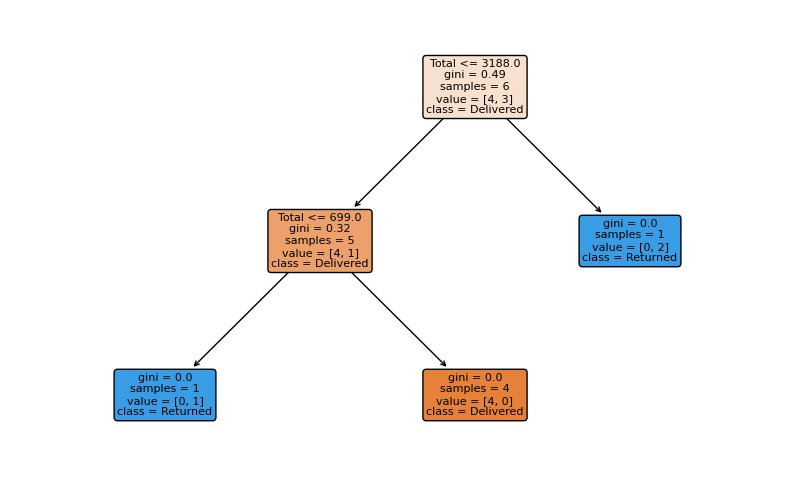

DecisionTreeClassifier(max_features='sqrt', random_state=2051556033)


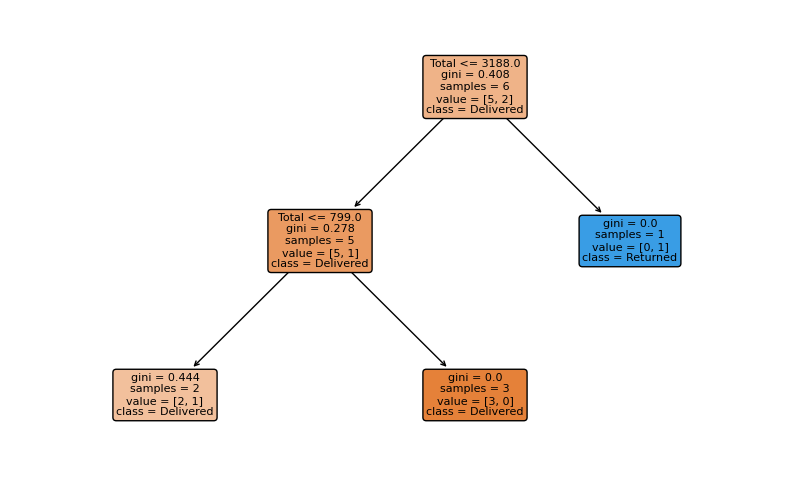

DecisionTreeClassifier(max_features='sqrt', random_state=1252949478)


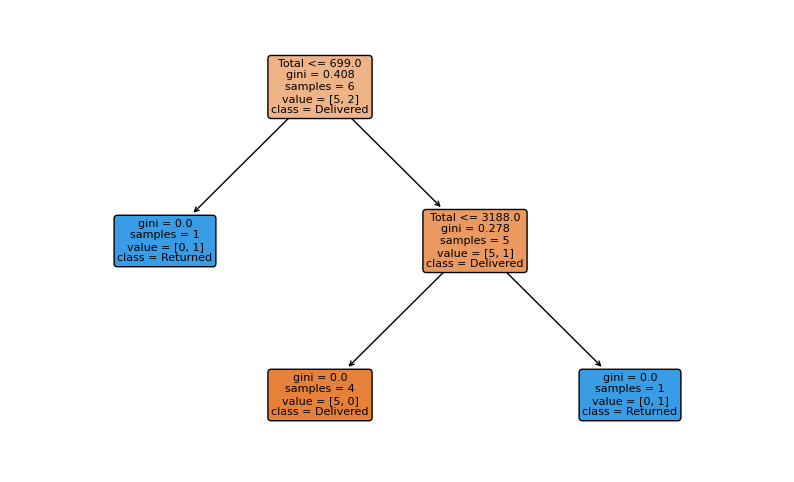

DecisionTreeClassifier(max_features='sqrt', random_state=1340754471)


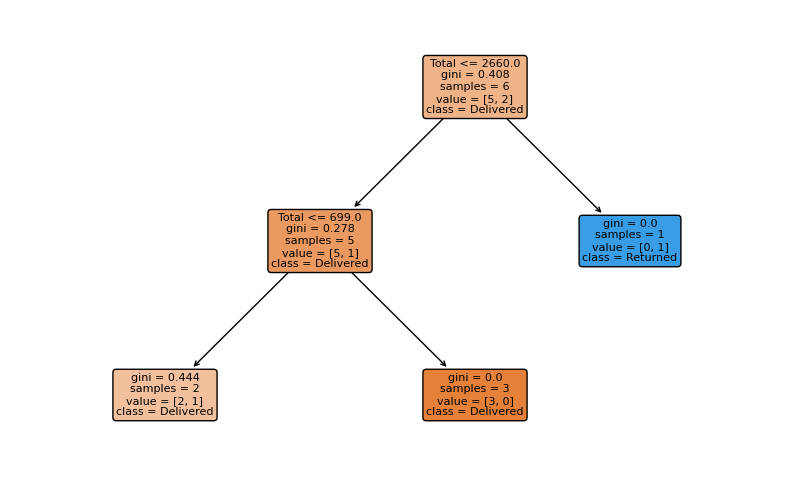

DecisionTreeClassifier(max_features='sqrt', random_state=124102743)


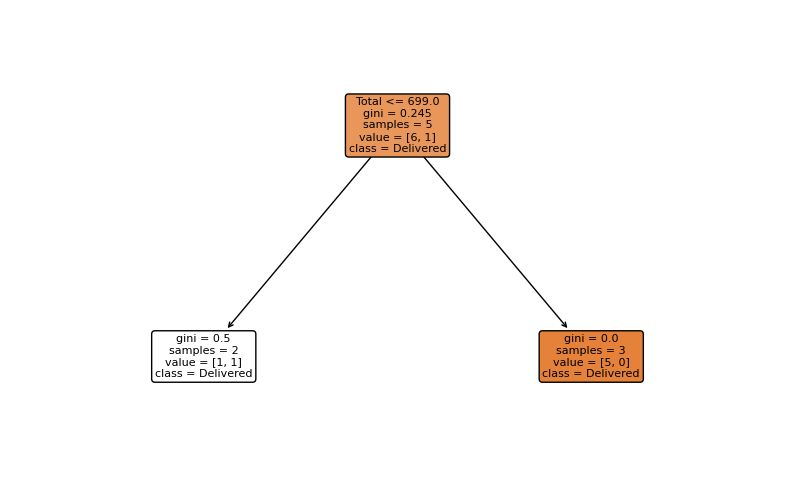

DecisionTreeClassifier(max_features='sqrt', random_state=2061486254)


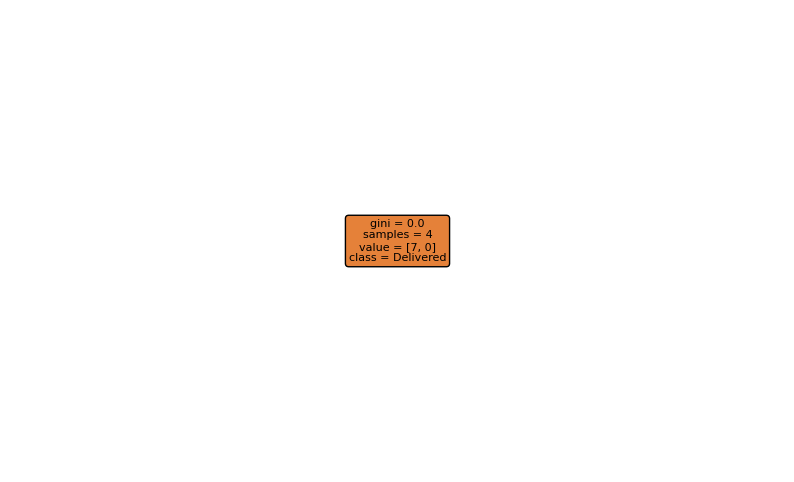

DecisionTreeClassifier(max_features='sqrt', random_state=292249176)


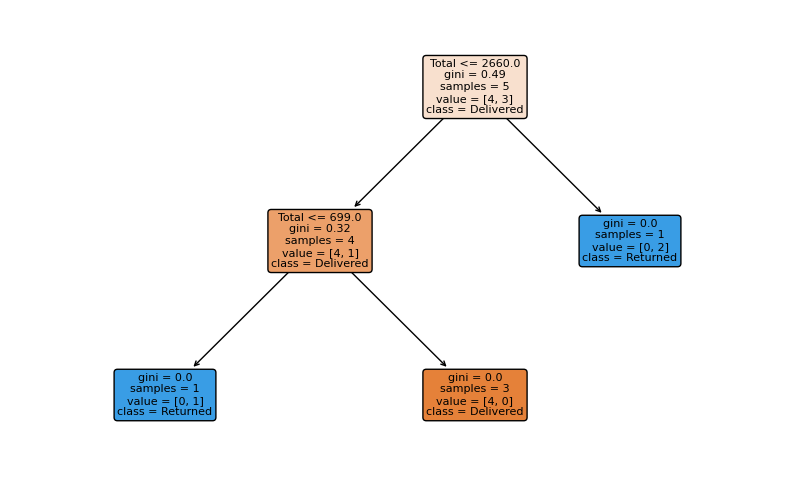

DecisionTreeClassifier(max_features='sqrt', random_state=1686997841)


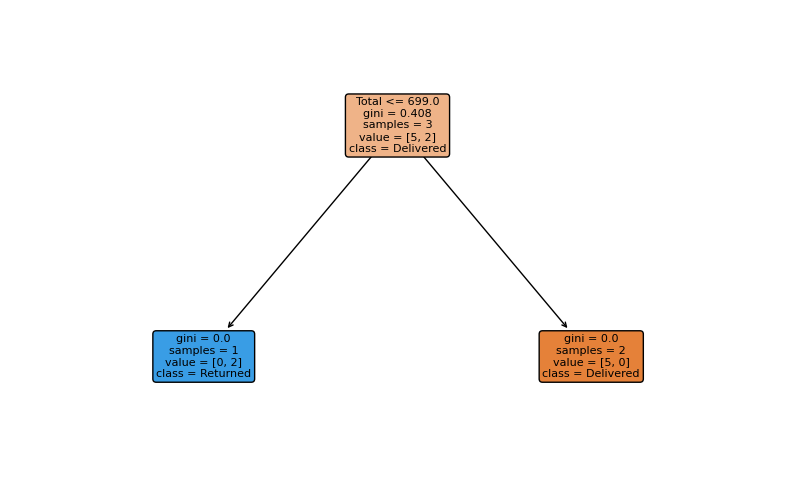

DecisionTreeClassifier(max_features='sqrt', random_state=1827923621)


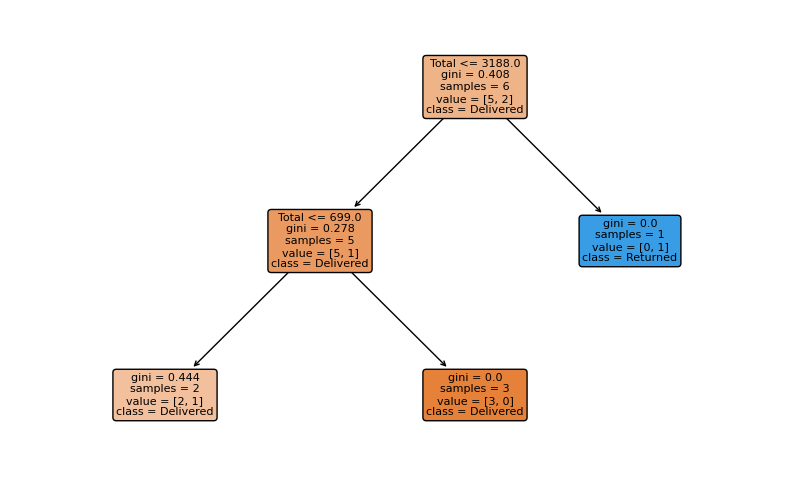

DecisionTreeClassifier(max_features='sqrt', random_state=1443447321)


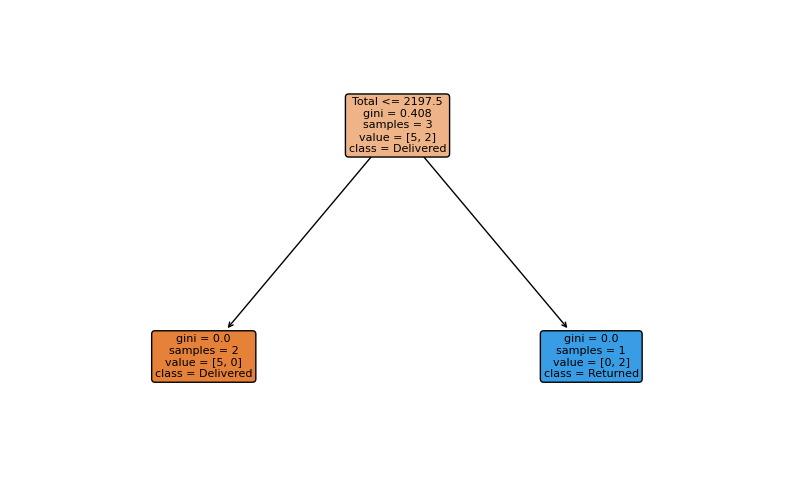

DecisionTreeClassifier(max_features='sqrt', random_state=305097549)


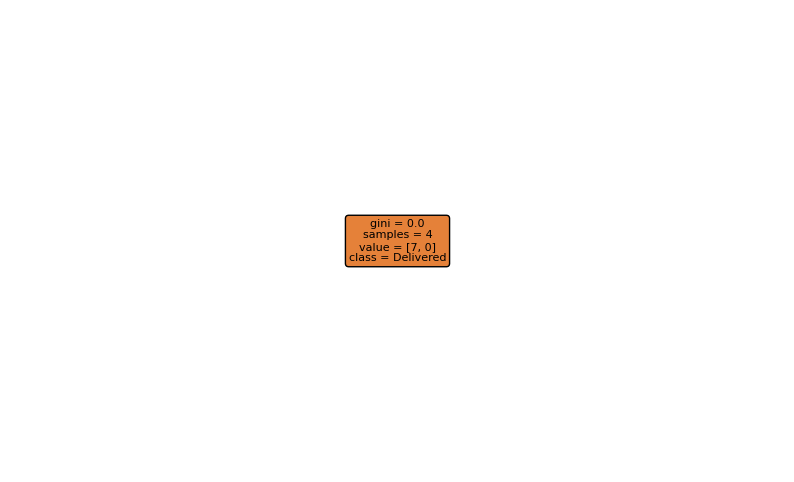

DecisionTreeClassifier(max_features='sqrt', random_state=1449105480)


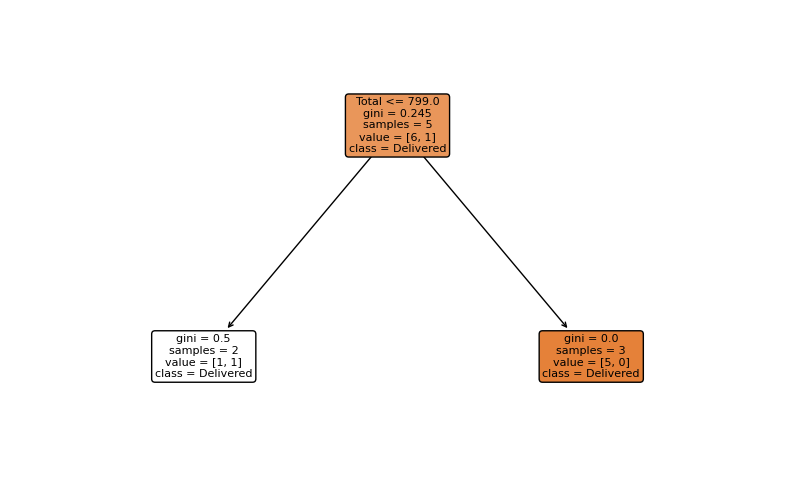

DecisionTreeClassifier(max_features='sqrt', random_state=374217481)


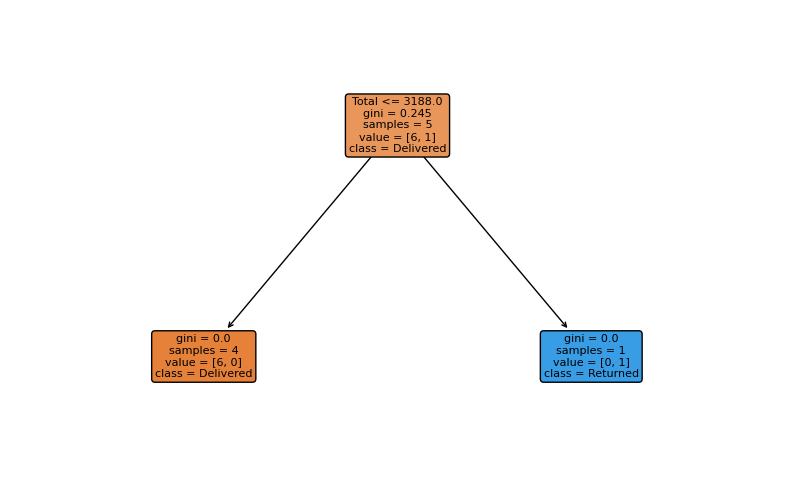

DecisionTreeClassifier(max_features='sqrt', random_state=636393364)


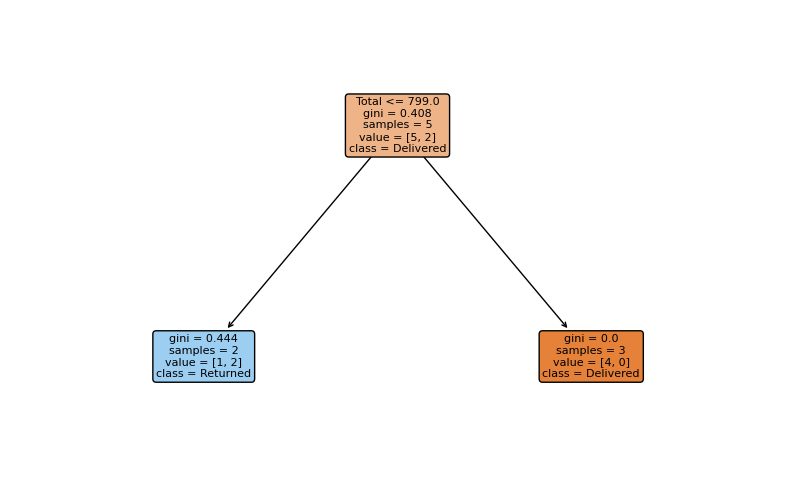

DecisionTreeClassifier(max_features='sqrt', random_state=86837363)


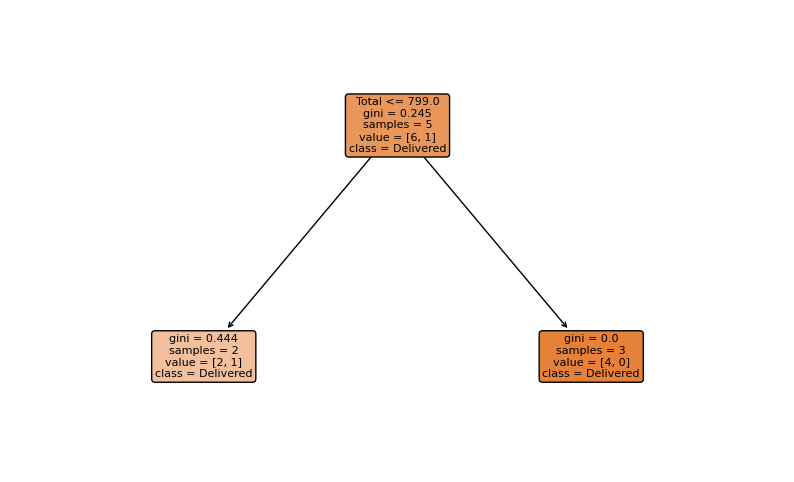

DecisionTreeClassifier(max_features='sqrt', random_state=1581585360)


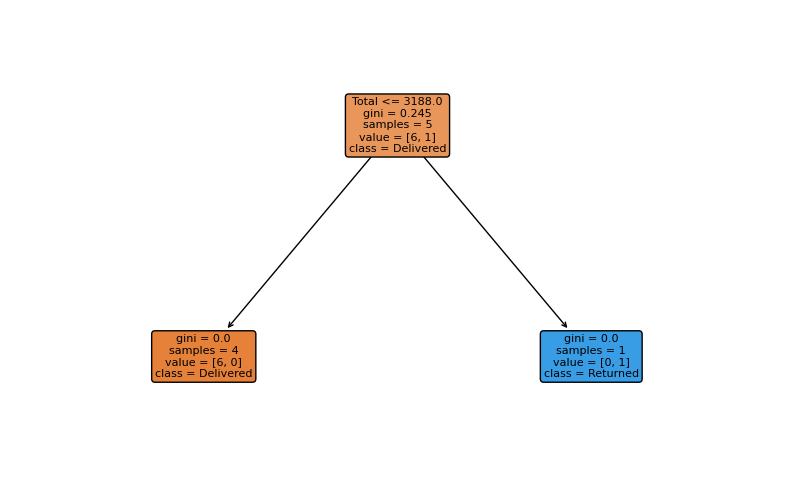

DecisionTreeClassifier(max_features='sqrt', random_state=1428591347)


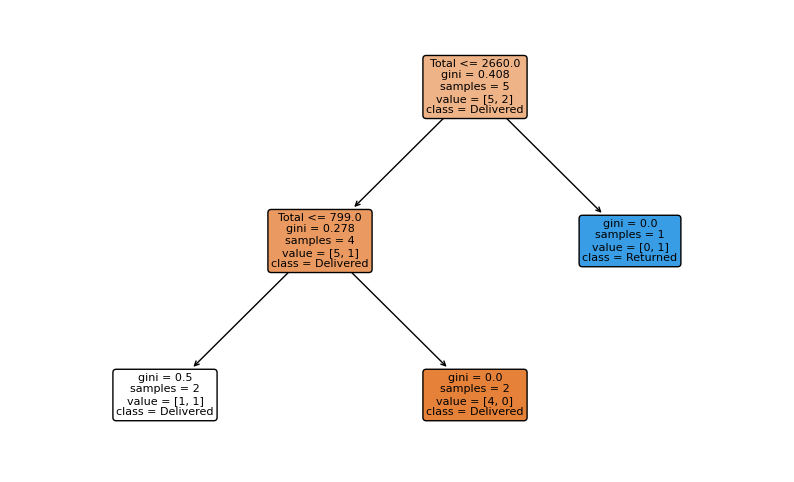

DecisionTreeClassifier(max_features='sqrt', random_state=1963466437)


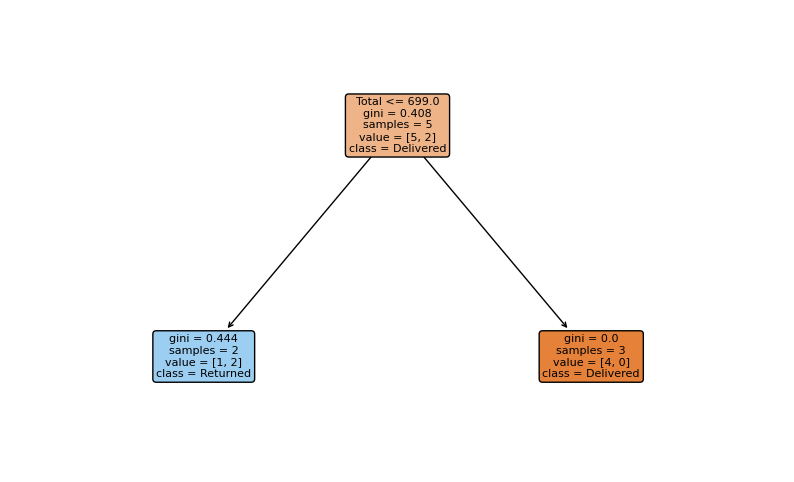

DecisionTreeClassifier(max_features='sqrt', random_state=1194674174)


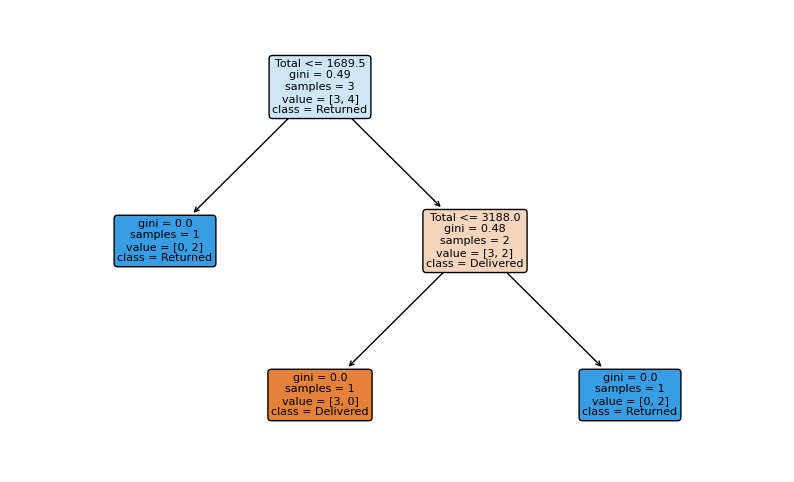

DecisionTreeClassifier(max_features='sqrt', random_state=602801999)


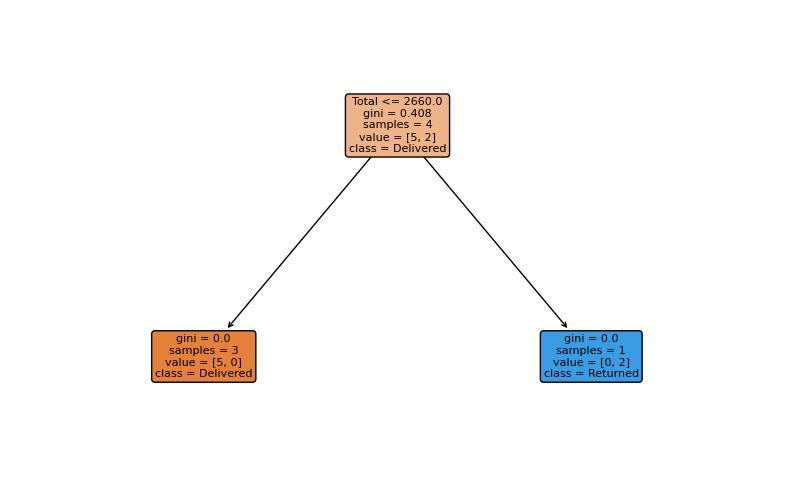

DecisionTreeClassifier(max_features='sqrt', random_state=1589190063)


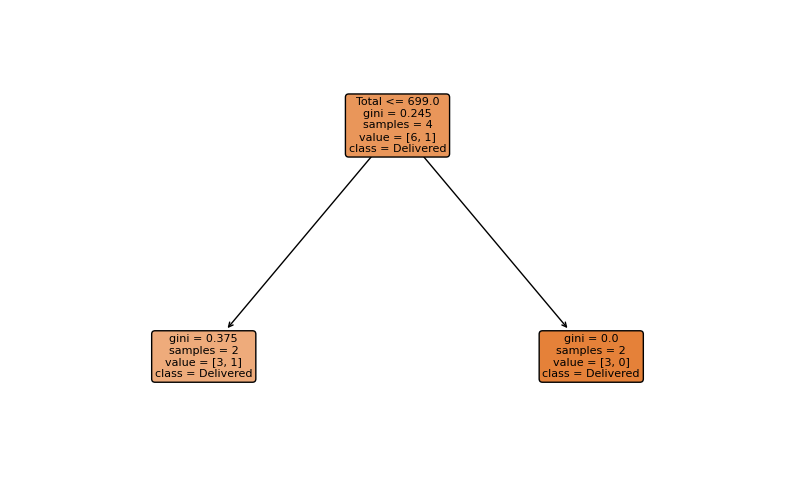

DecisionTreeClassifier(max_features='sqrt', random_state=1589512640)


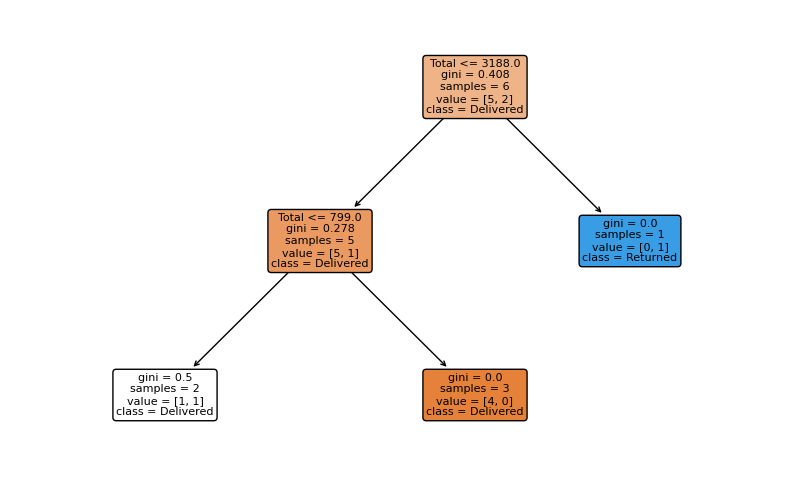

DecisionTreeClassifier(max_features='sqrt', random_state=2055650130)


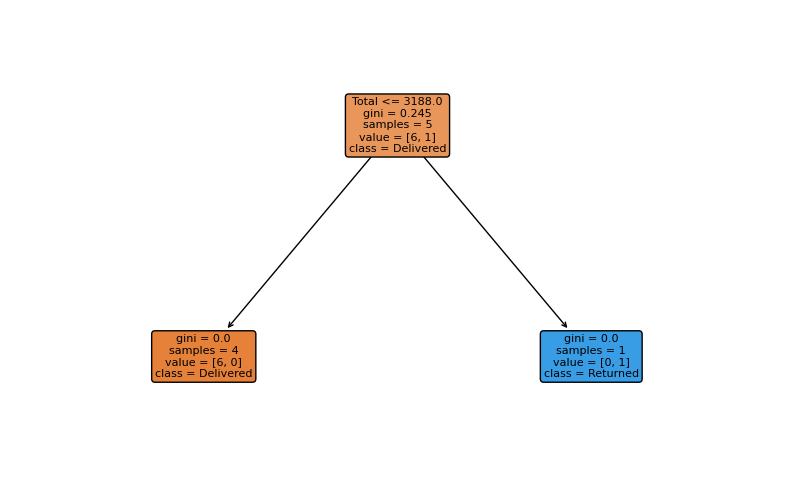

DecisionTreeClassifier(max_features='sqrt', random_state=2034131043)


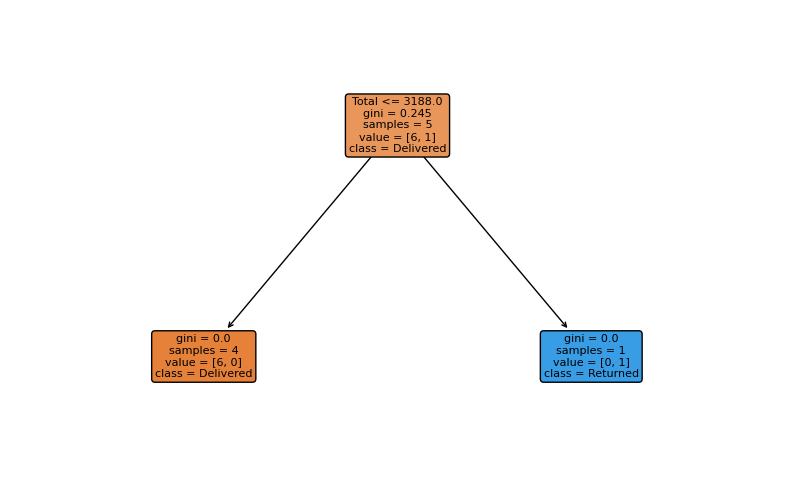

DecisionTreeClassifier(max_features='sqrt', random_state=1284876248)


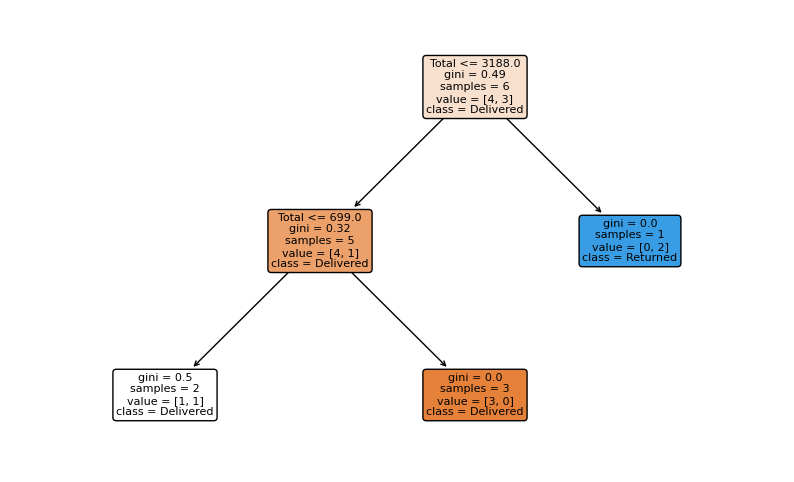

DecisionTreeClassifier(max_features='sqrt', random_state=1292401841)


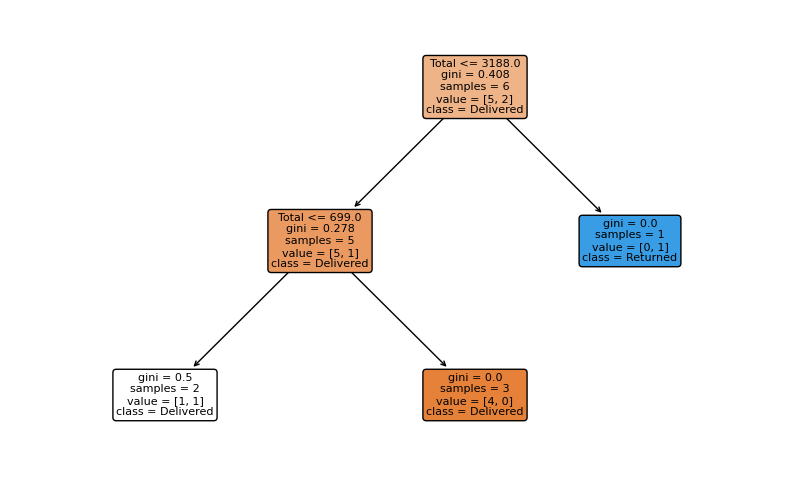

DecisionTreeClassifier(max_features='sqrt', random_state=1982038771)


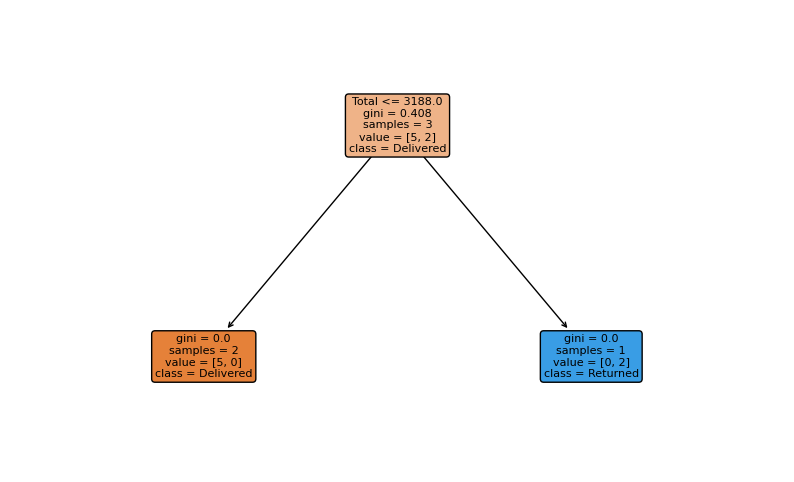

DecisionTreeClassifier(max_features='sqrt', random_state=87950109)


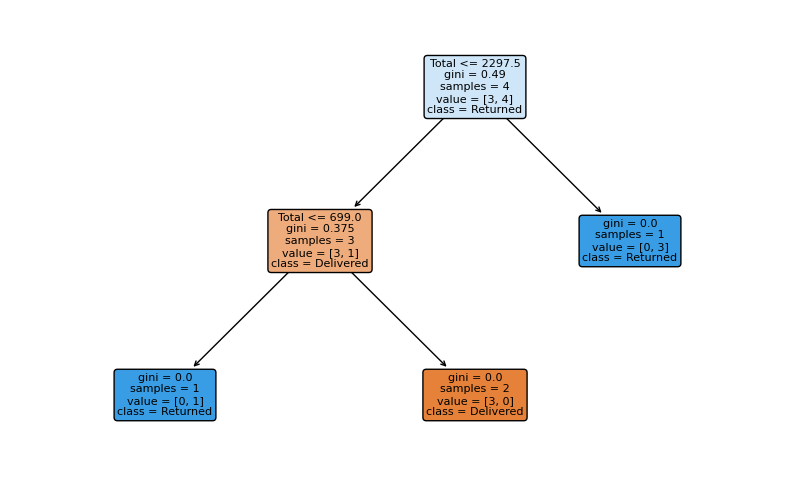

DecisionTreeClassifier(max_features='sqrt', random_state=1204863635)


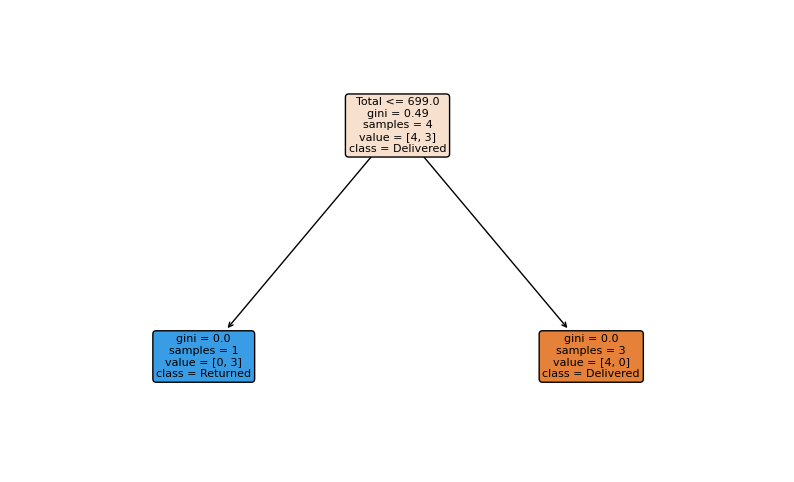

DecisionTreeClassifier(max_features='sqrt', random_state=768281747)


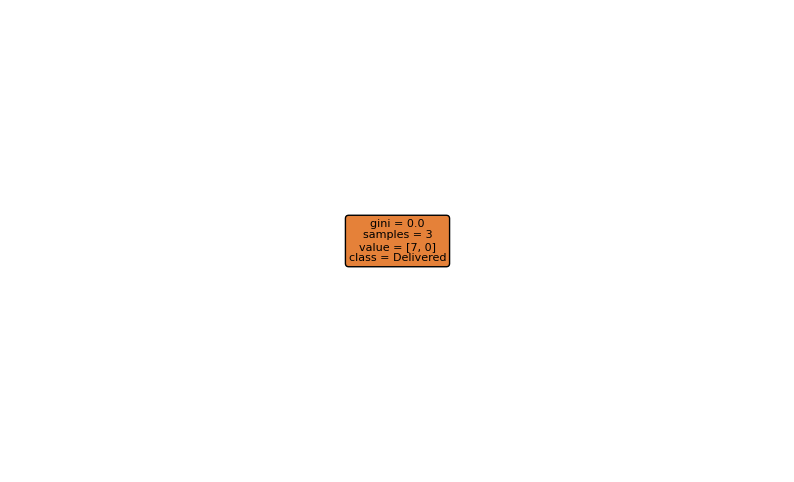

DecisionTreeClassifier(max_features='sqrt', random_state=507984782)


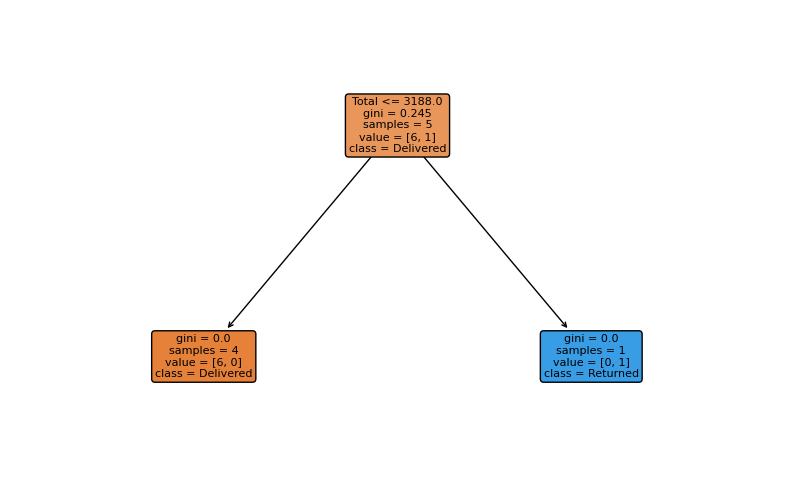

DecisionTreeClassifier(max_features='sqrt', random_state=947610023)


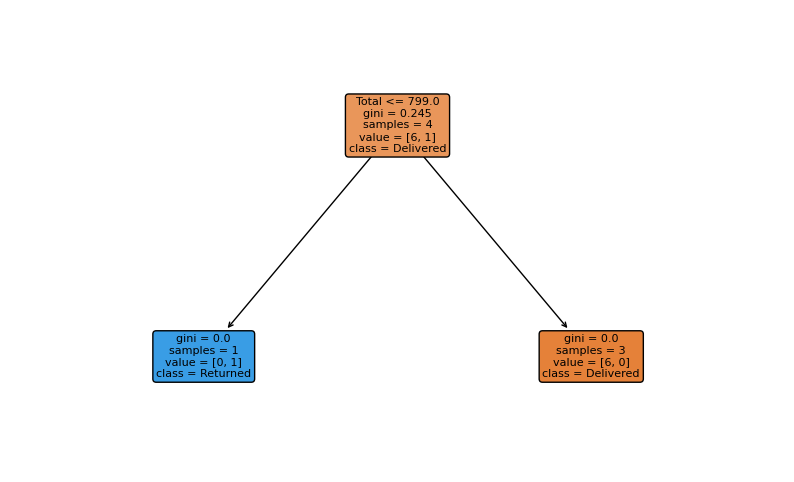

DecisionTreeClassifier(max_features='sqrt', random_state=600956192)


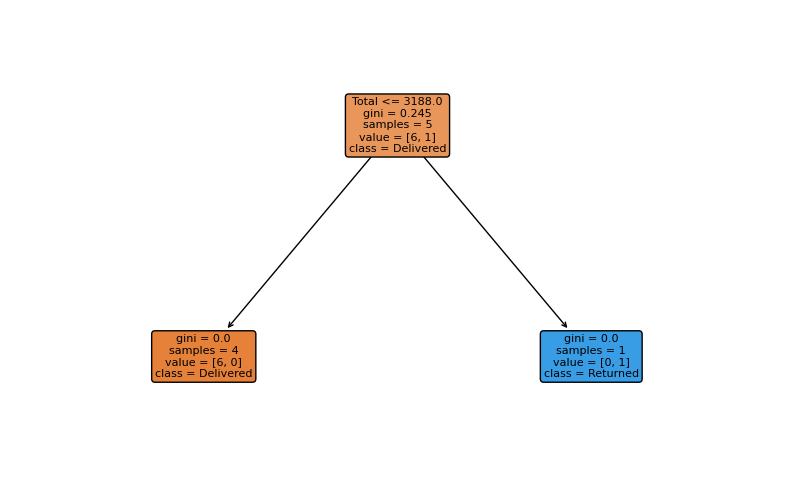

DecisionTreeClassifier(max_features='sqrt', random_state=352272321)


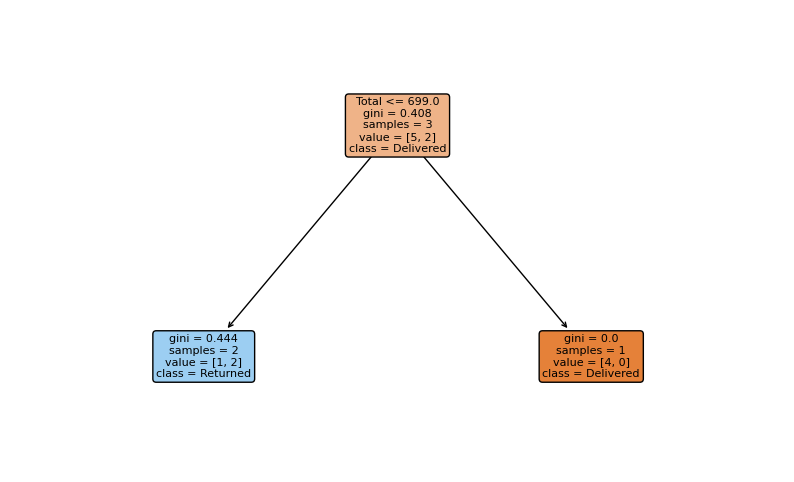

DecisionTreeClassifier(max_features='sqrt', random_state=615697673)


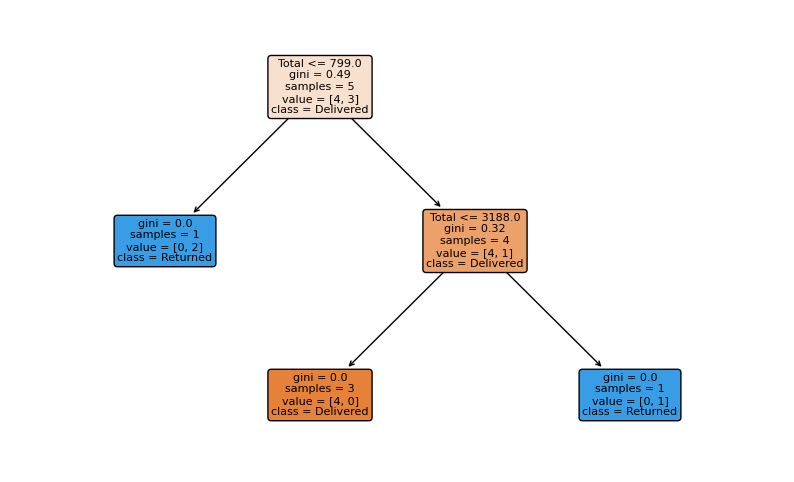

DecisionTreeClassifier(max_features='sqrt', random_state=160516793)


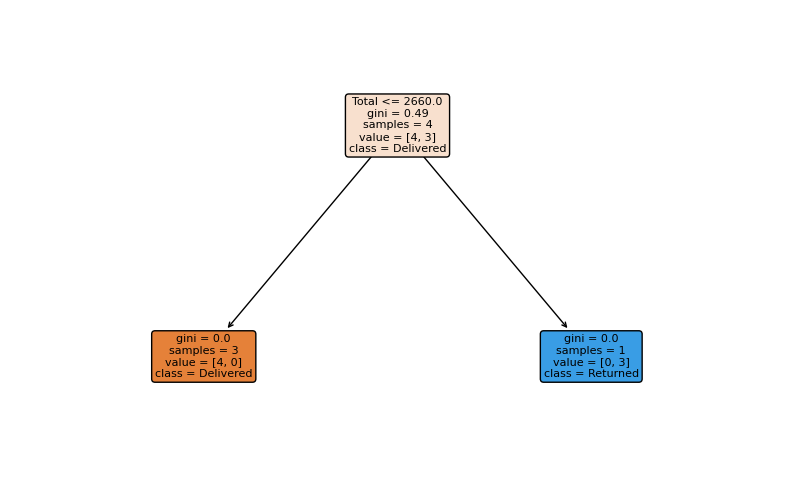

DecisionTreeClassifier(max_features='sqrt', random_state=1909838463)


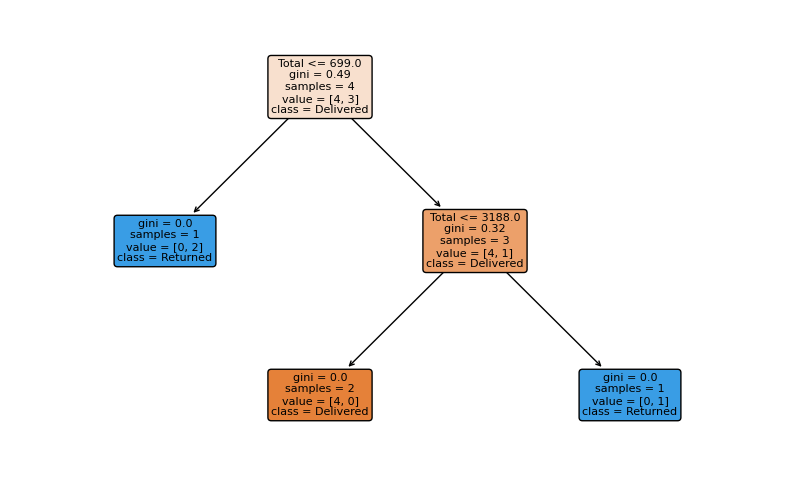

DecisionTreeClassifier(max_features='sqrt', random_state=1110745632)


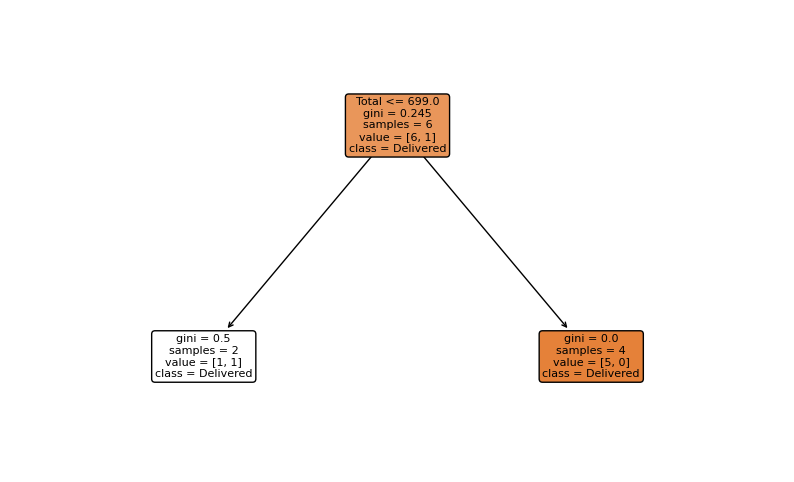

DecisionTreeClassifier(max_features='sqrt', random_state=93837855)


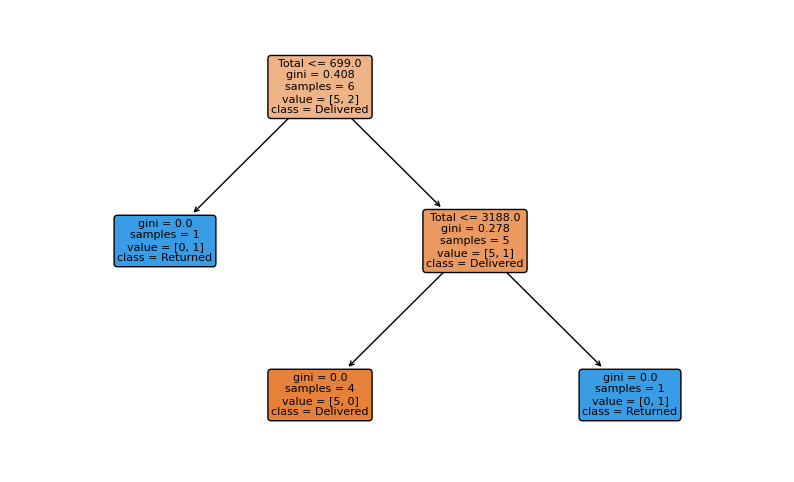

DecisionTreeClassifier(max_features='sqrt', random_state=454869706)


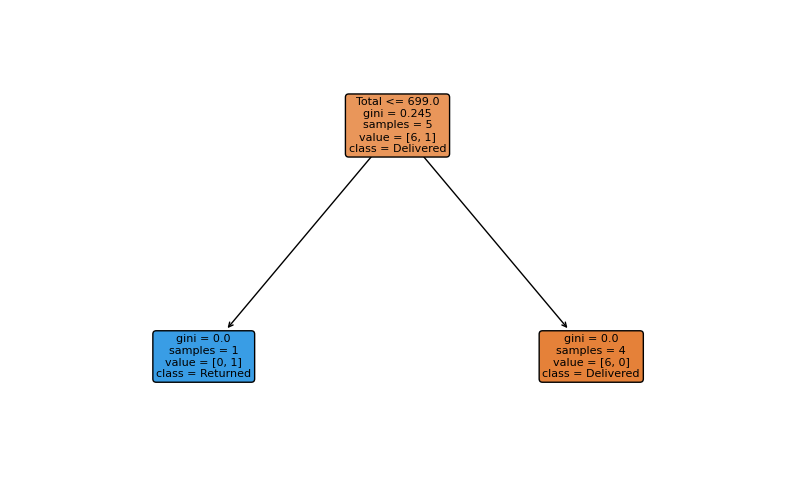

DecisionTreeClassifier(max_features='sqrt', random_state=1780959476)


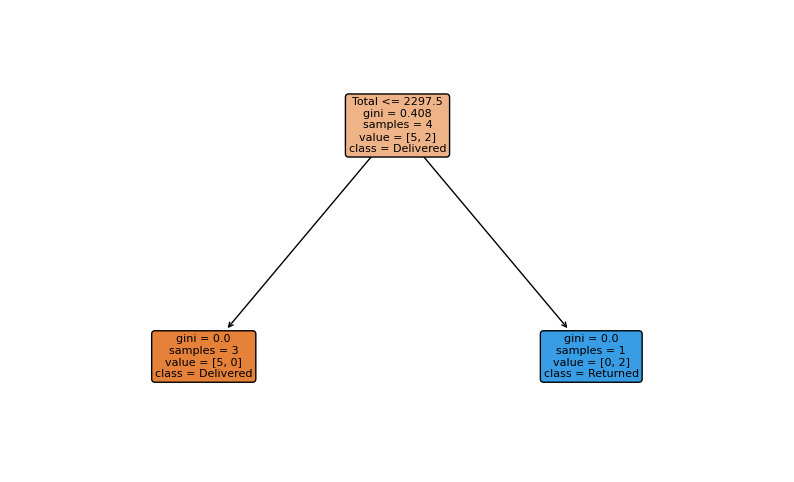

DecisionTreeClassifier(max_features='sqrt', random_state=2034098327)


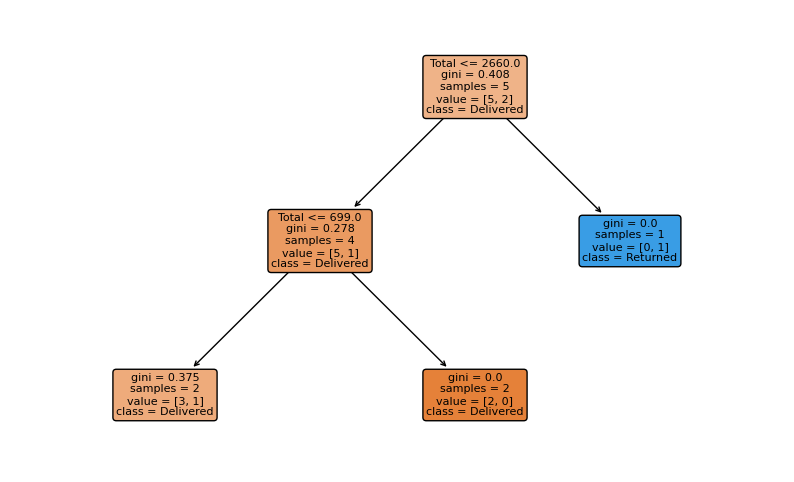

DecisionTreeClassifier(max_features='sqrt', random_state=1136257699)


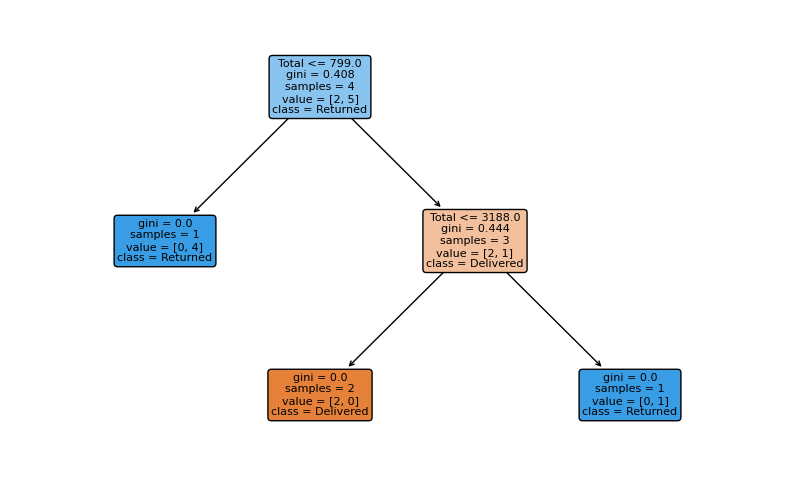

DecisionTreeClassifier(max_features='sqrt', random_state=800291326)


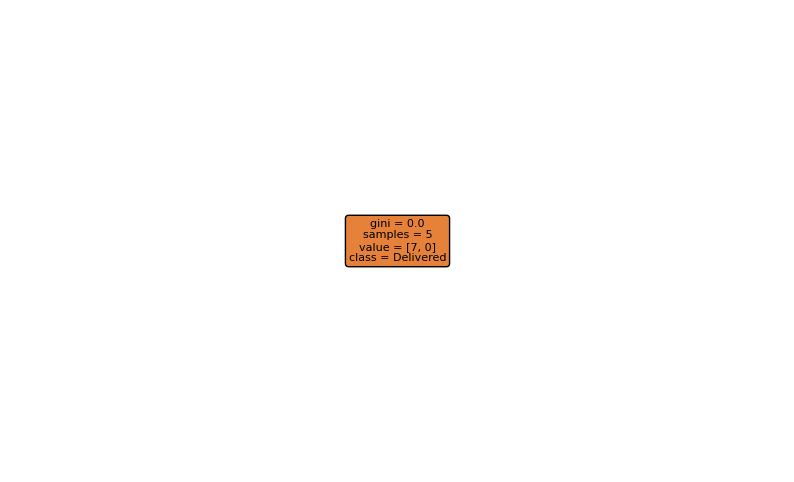

DecisionTreeClassifier(max_features='sqrt', random_state=1177824715)


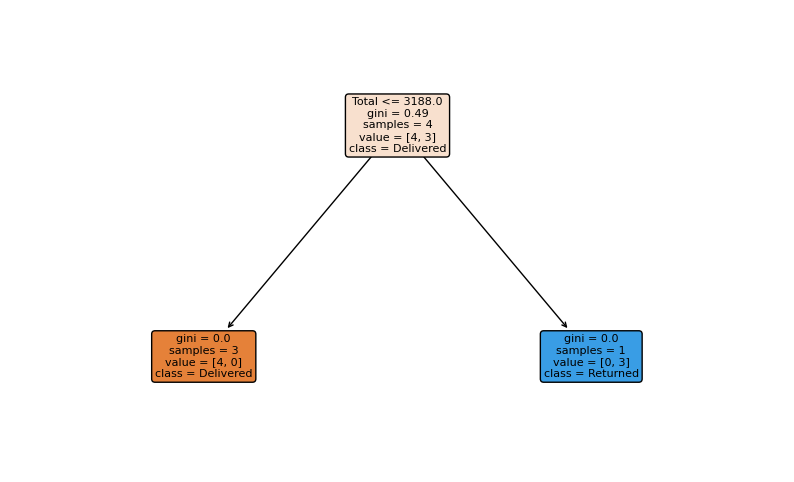

DecisionTreeClassifier(max_features='sqrt', random_state=1017555826)


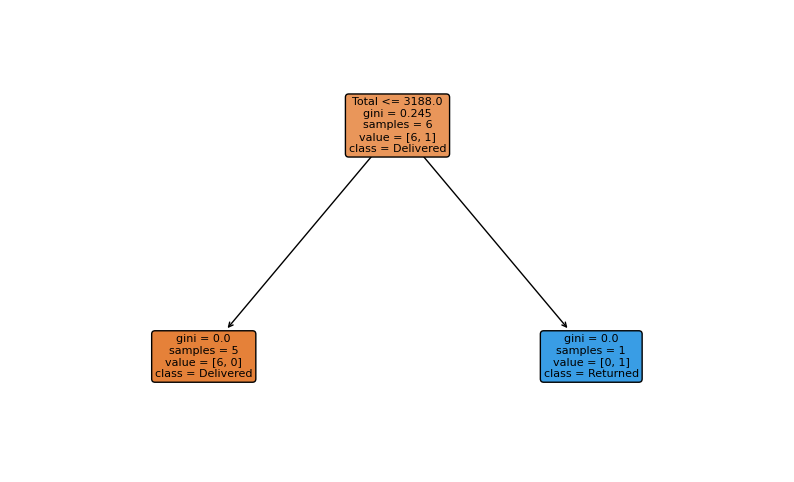

DecisionTreeClassifier(max_features='sqrt', random_state=1959150775)


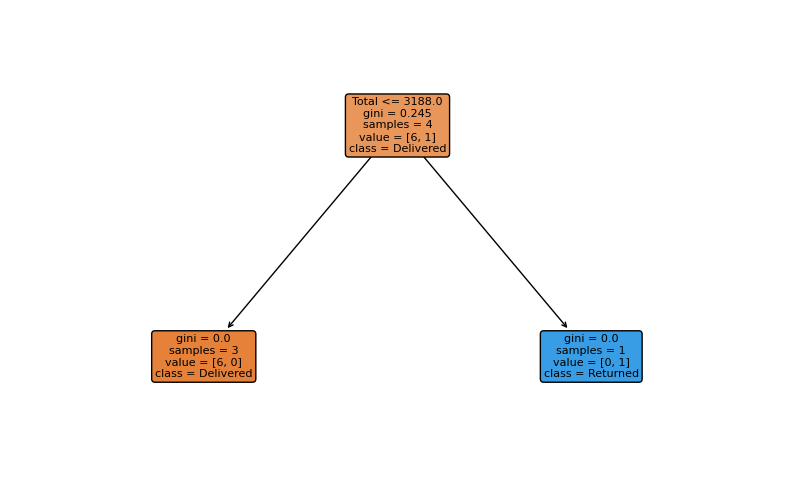

DecisionTreeClassifier(max_features='sqrt', random_state=930076700)


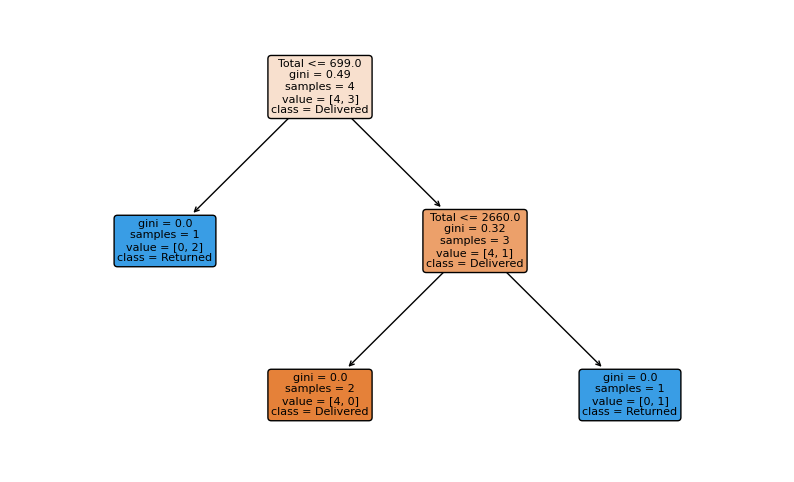

DecisionTreeClassifier(max_features='sqrt', random_state=293921570)


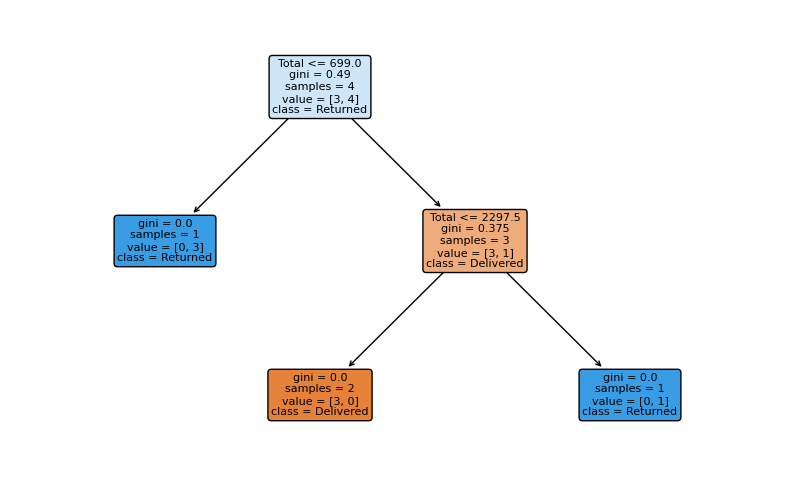

DecisionTreeClassifier(max_features='sqrt', random_state=580757632)


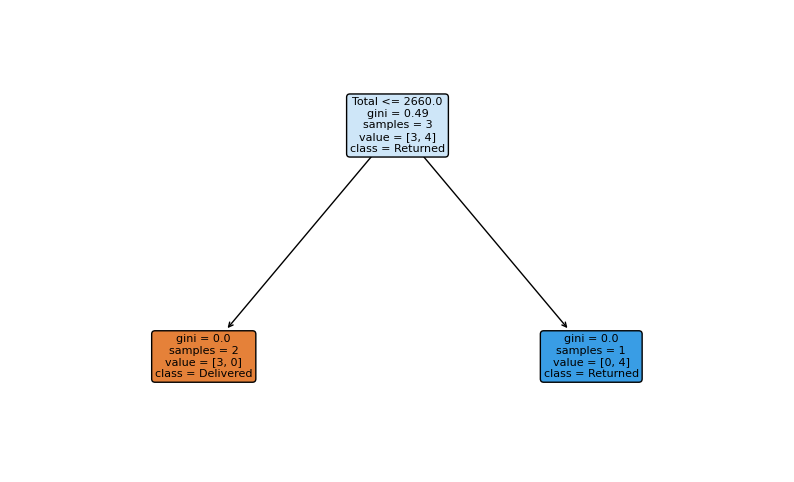

DecisionTreeClassifier(max_features='sqrt', random_state=80701568)


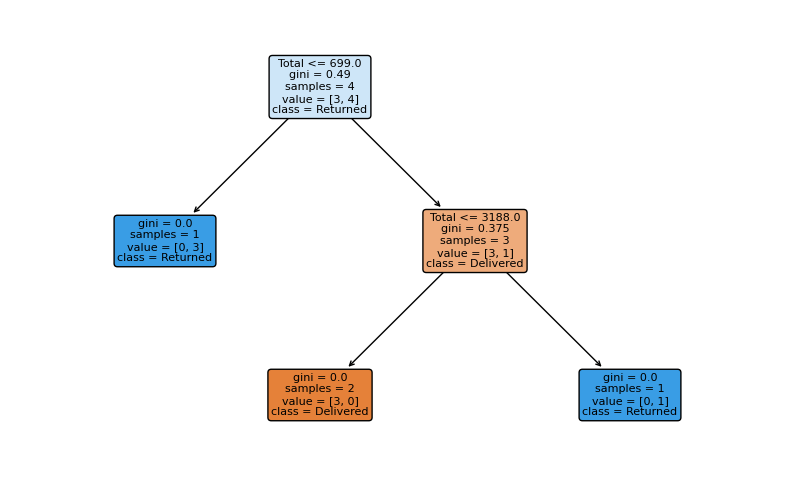

DecisionTreeClassifier(max_features='sqrt', random_state=1392175012)


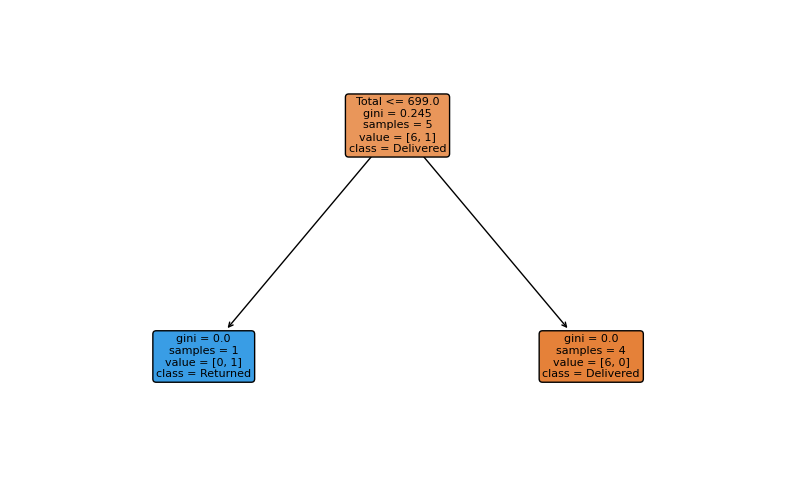

DecisionTreeClassifier(max_features='sqrt', random_state=505240629)


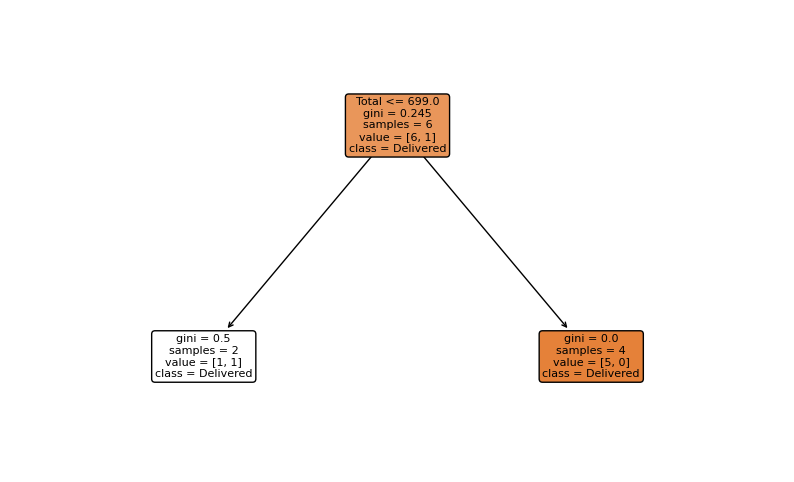

DecisionTreeClassifier(max_features='sqrt', random_state=642848645)


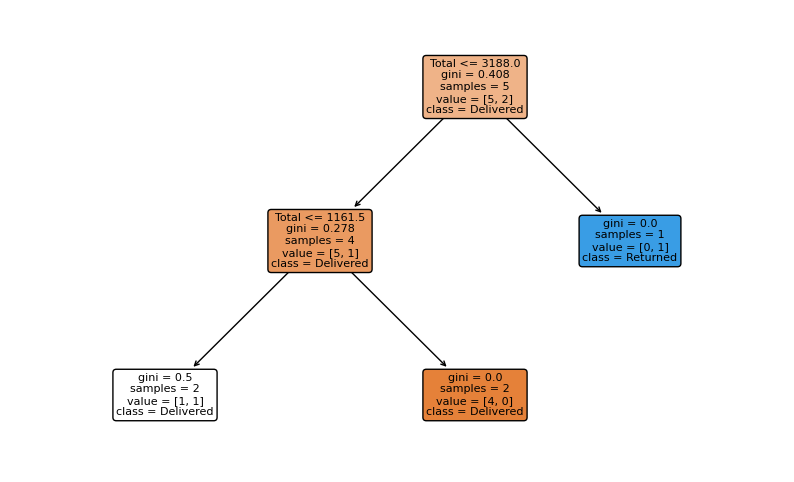

DecisionTreeClassifier(max_features='sqrt', random_state=481447462)


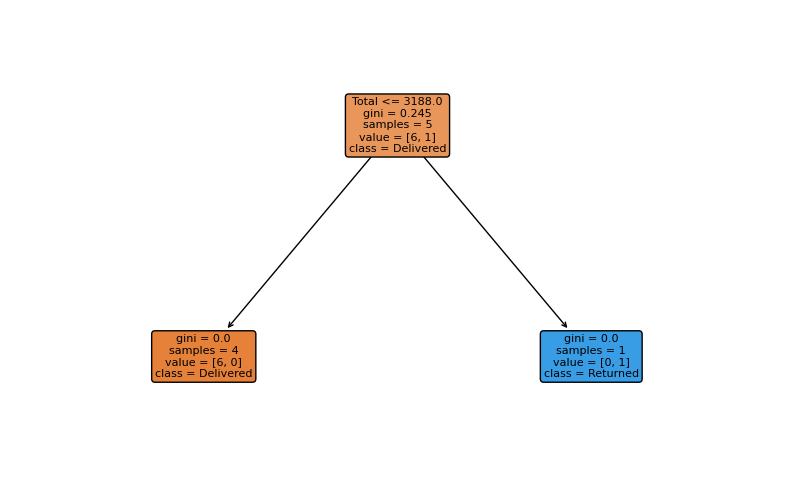

DecisionTreeClassifier(max_features='sqrt', random_state=954863080)


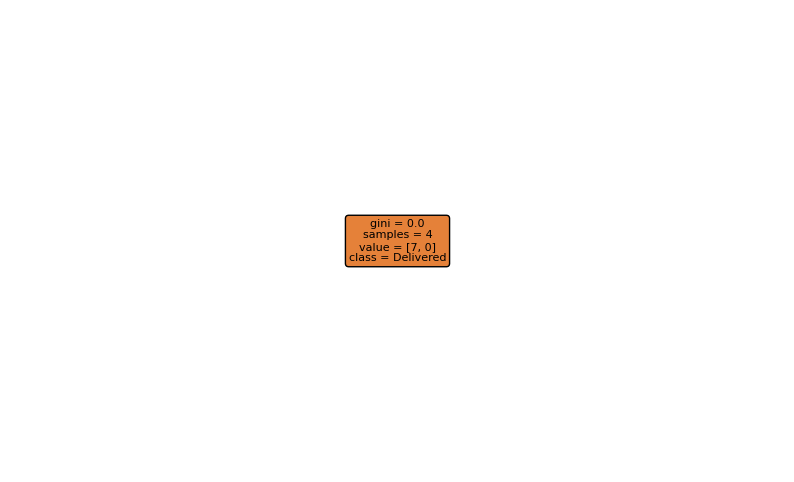

DecisionTreeClassifier(max_features='sqrt', random_state=502227700)


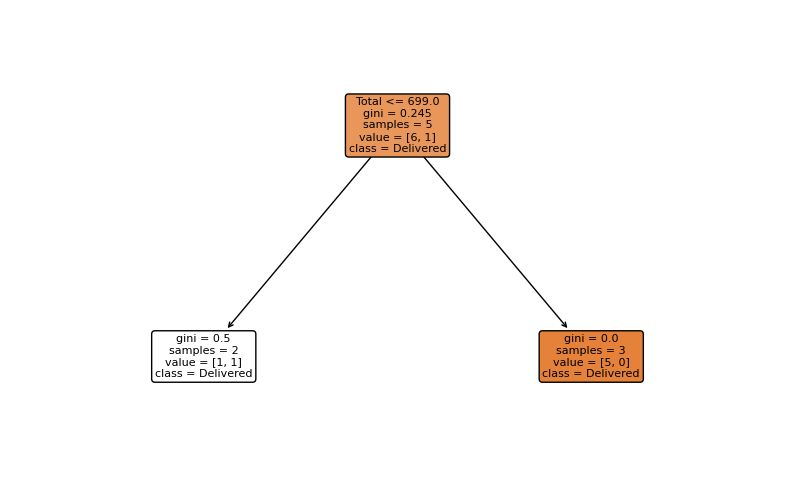

DecisionTreeClassifier(max_features='sqrt', random_state=1659957521)


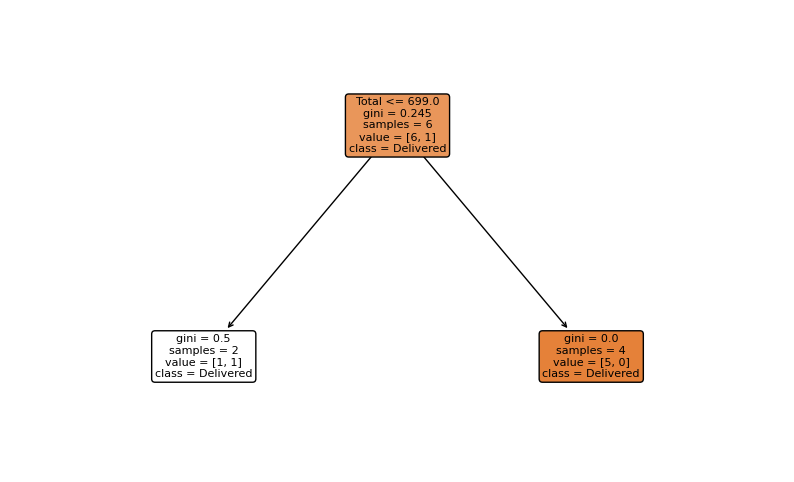

DecisionTreeClassifier(max_features='sqrt', random_state=1905883471)


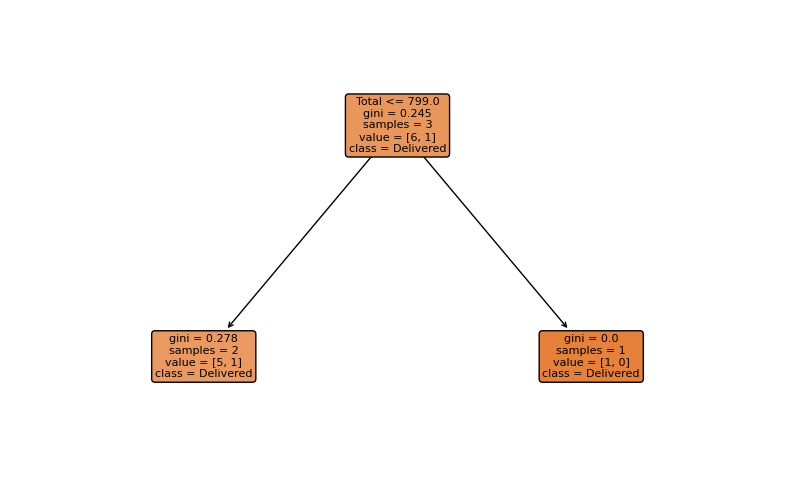

DecisionTreeClassifier(max_features='sqrt', random_state=1729147268)


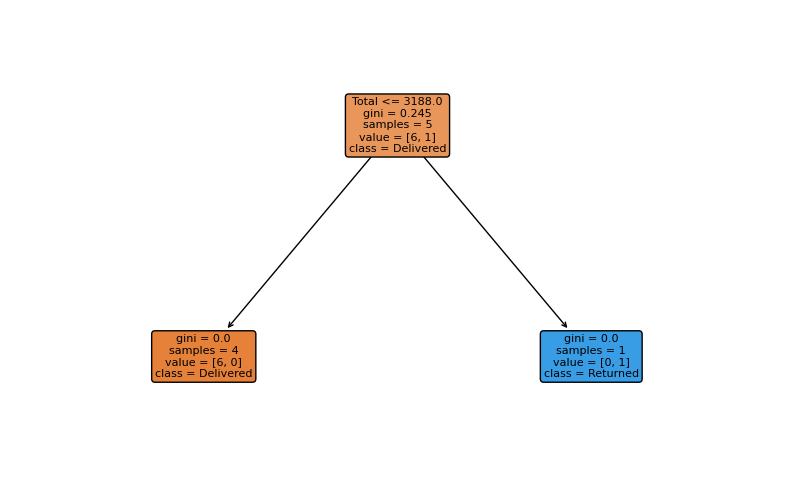

DecisionTreeClassifier(max_features='sqrt', random_state=780912233)


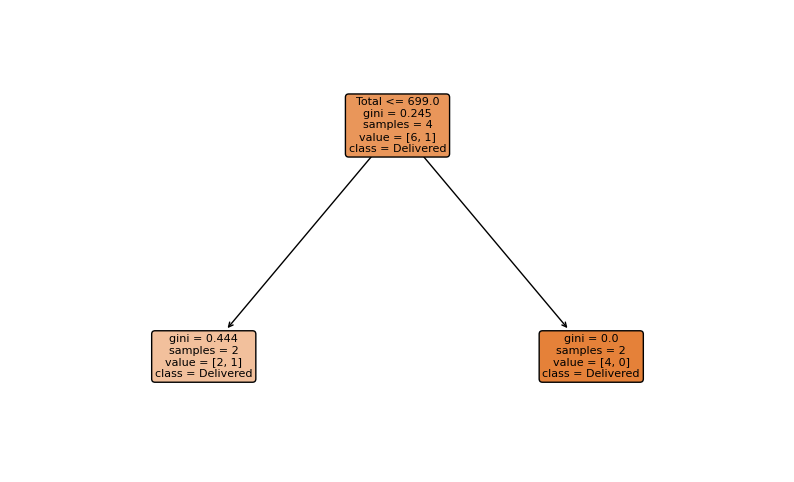

DecisionTreeClassifier(max_features='sqrt', random_state=1932520490)


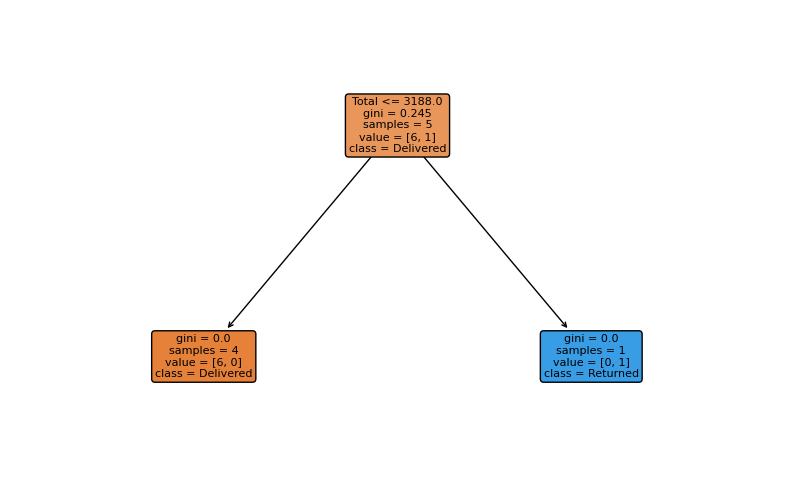

DecisionTreeClassifier(max_features='sqrt', random_state=1544074682)


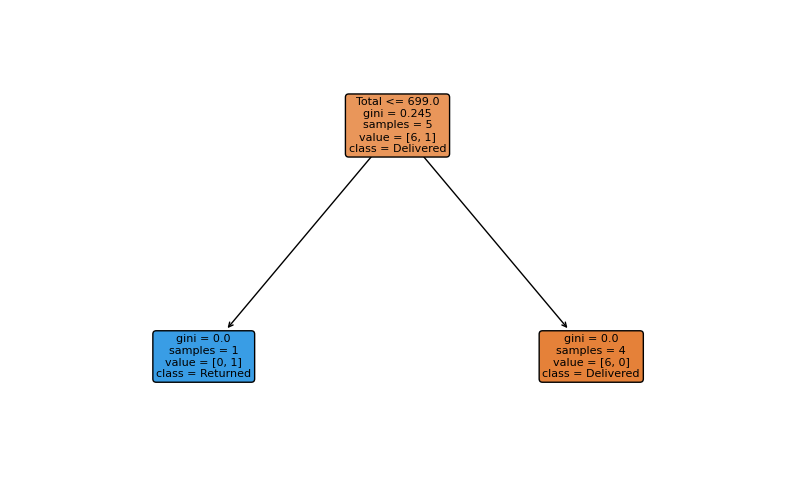

DecisionTreeClassifier(max_features='sqrt', random_state=485603871)


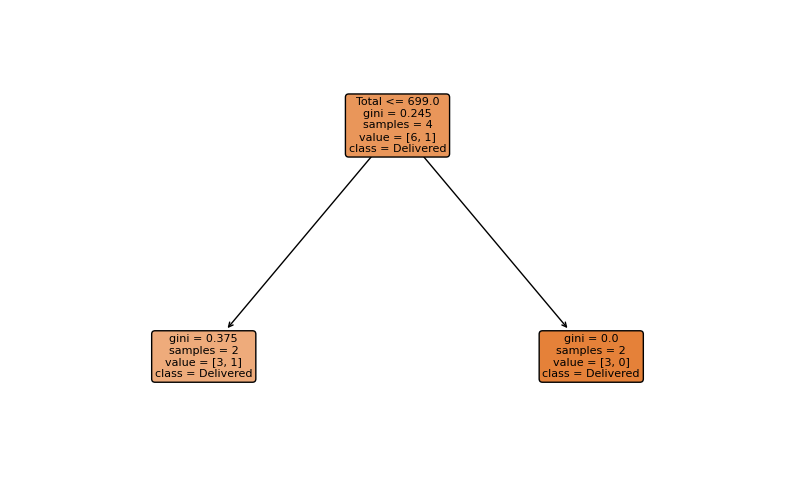

DecisionTreeClassifier(max_features='sqrt', random_state=1877037944)


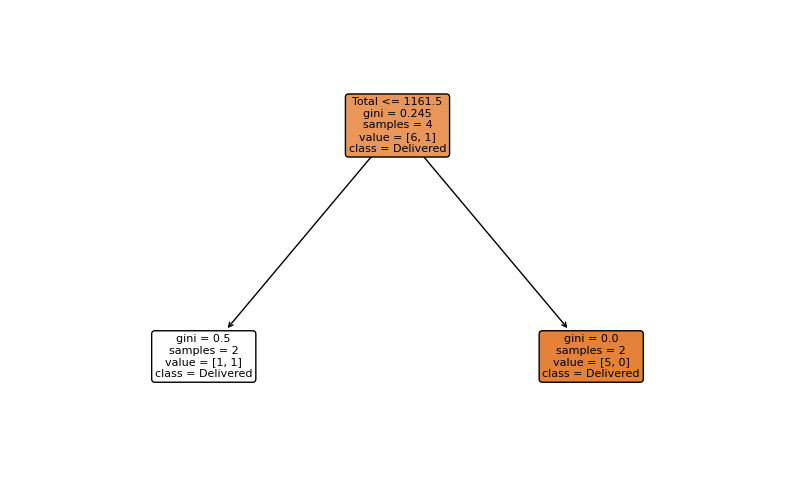

DecisionTreeClassifier(max_features='sqrt', random_state=1728073985)


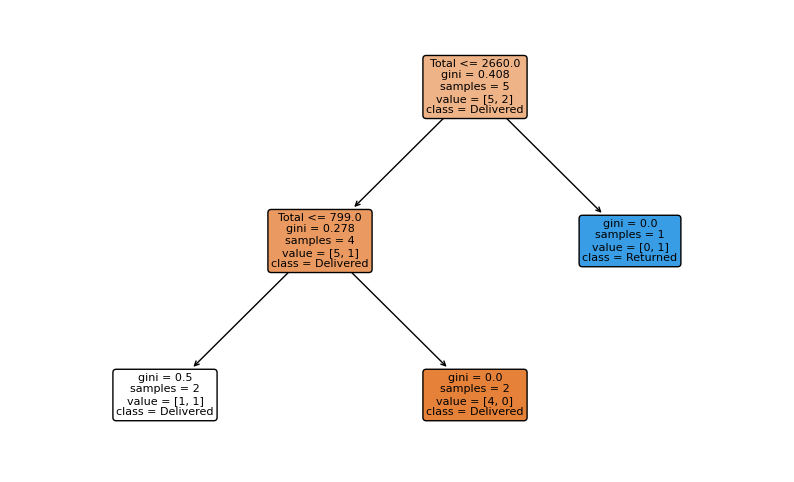

DecisionTreeClassifier(max_features='sqrt', random_state=848819521)


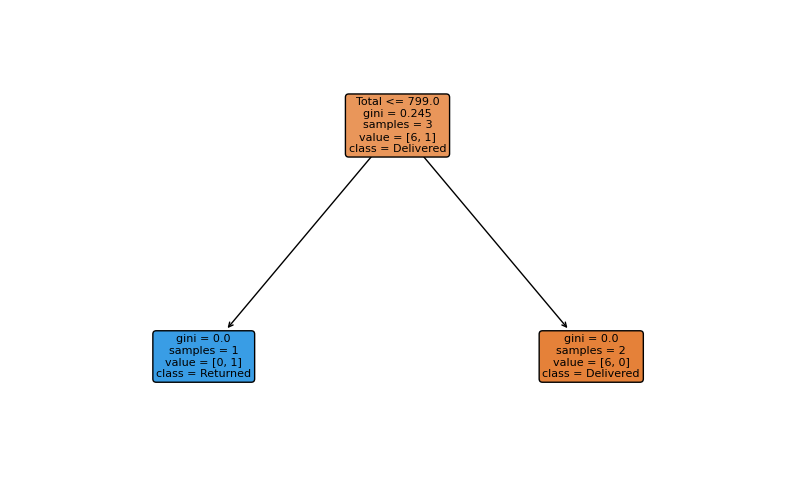

DecisionTreeClassifier(max_features='sqrt', random_state=426405863)


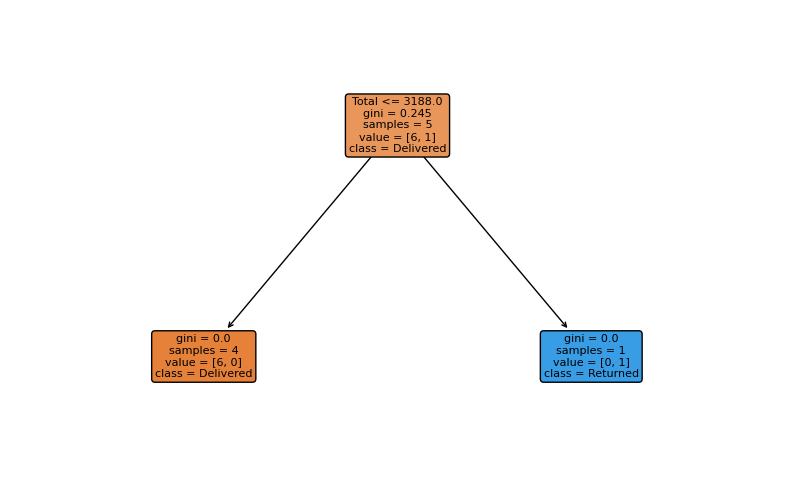

DecisionTreeClassifier(max_features='sqrt', random_state=258666409)


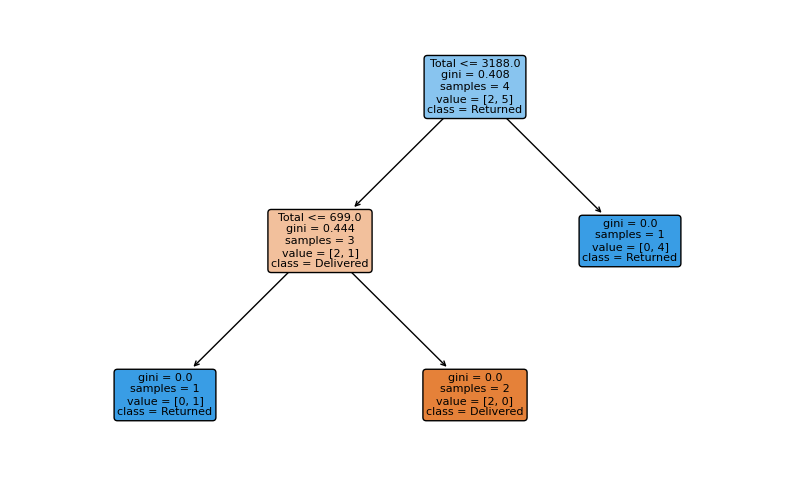

DecisionTreeClassifier(max_features='sqrt', random_state=2017814585)


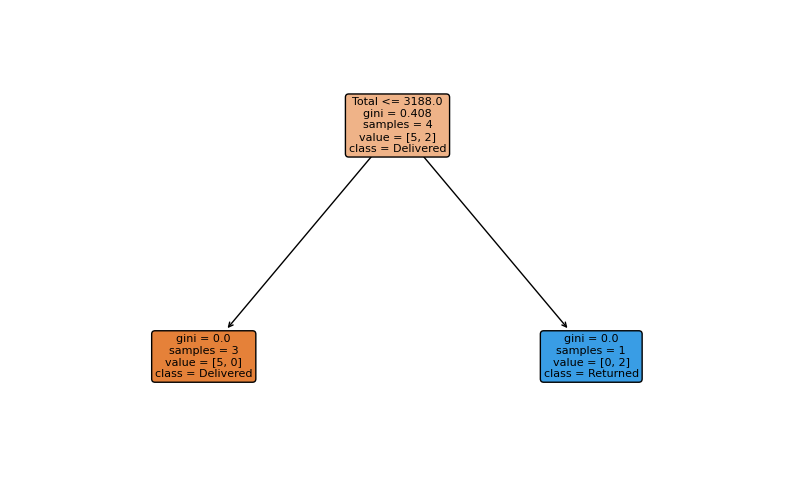

DecisionTreeClassifier(max_features='sqrt', random_state=716257571)


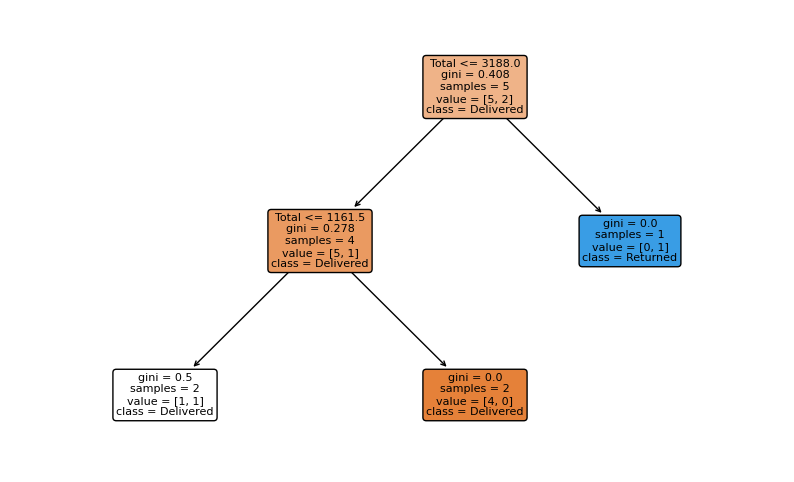

DecisionTreeClassifier(max_features='sqrt', random_state=657731430)


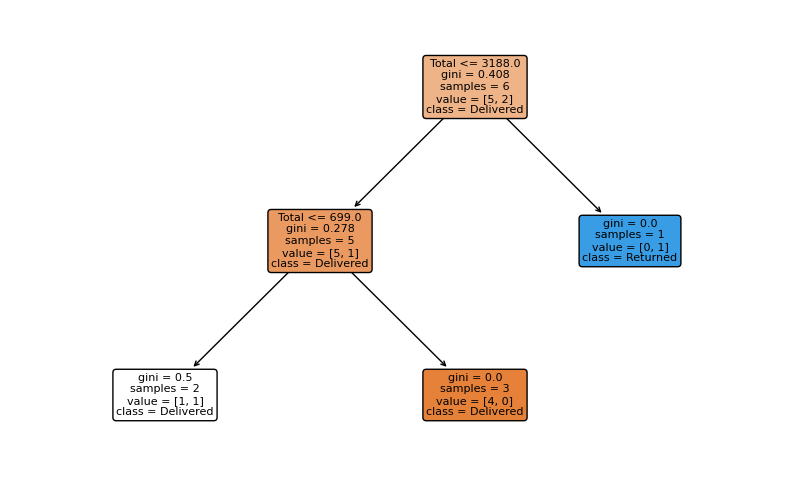

DecisionTreeClassifier(max_features='sqrt', random_state=732884087)


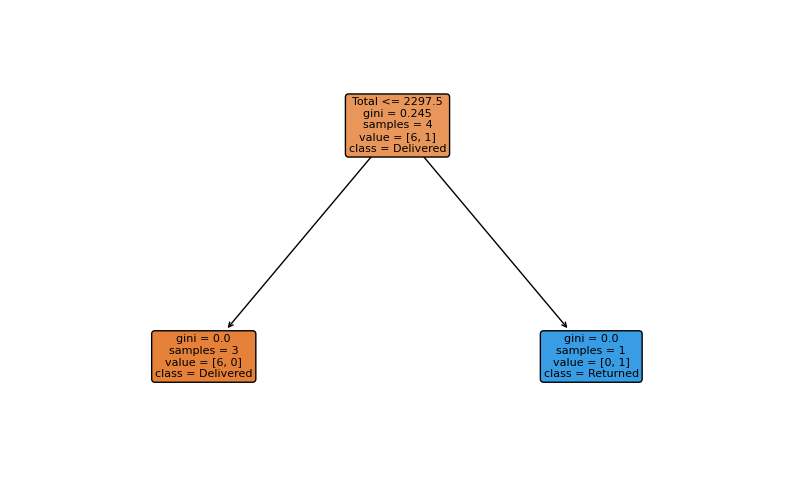

DecisionTreeClassifier(max_features='sqrt', random_state=734051083)


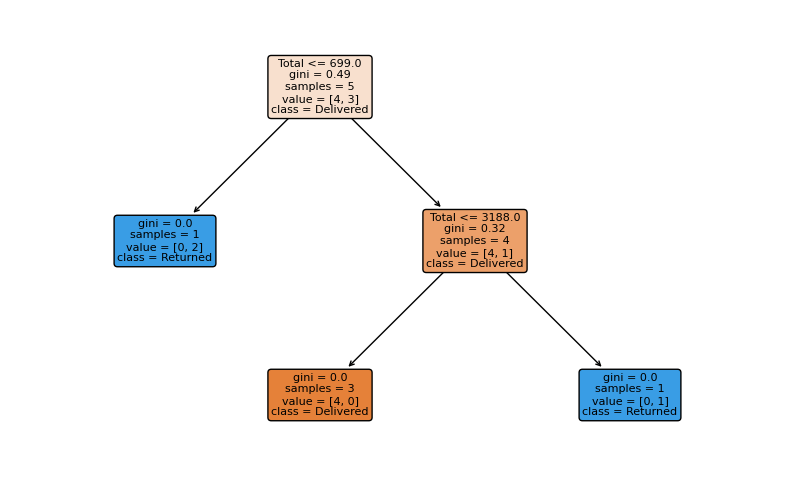

DecisionTreeClassifier(max_features='sqrt', random_state=903586222)


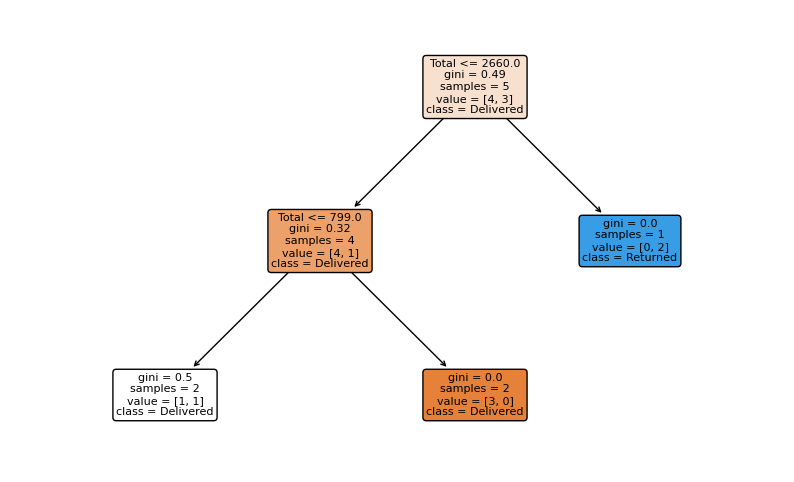

DecisionTreeClassifier(max_features='sqrt', random_state=1538251858)


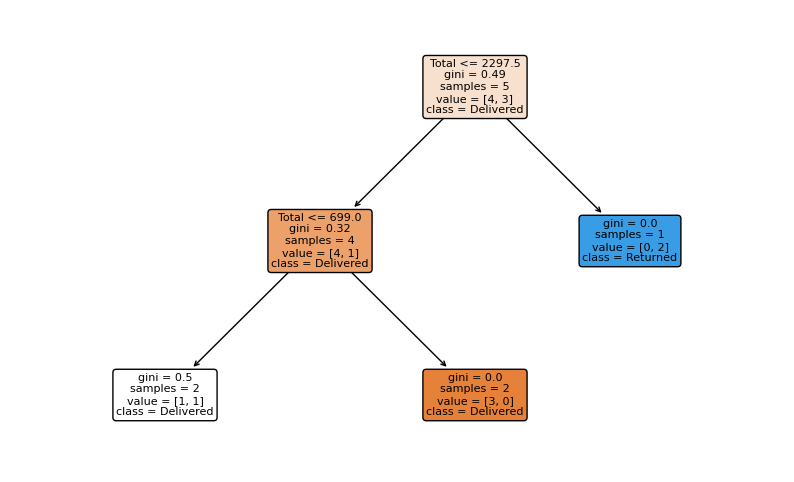

DecisionTreeClassifier(max_features='sqrt', random_state=553734235)


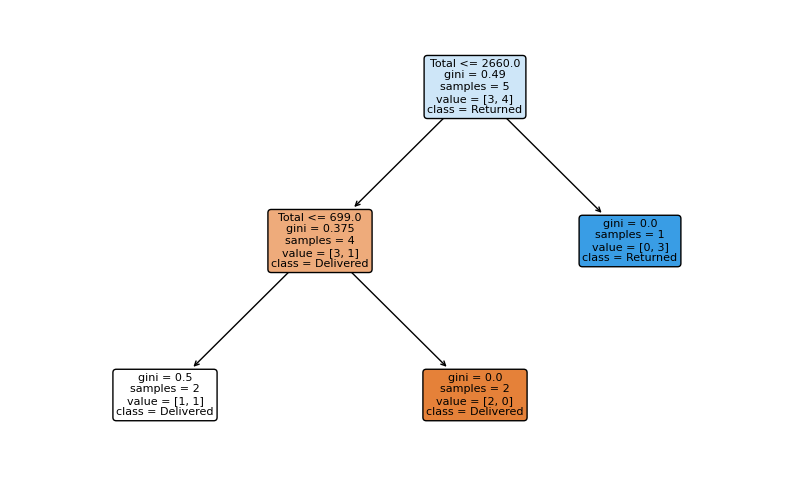

DecisionTreeClassifier(max_features='sqrt', random_state=1076688768)


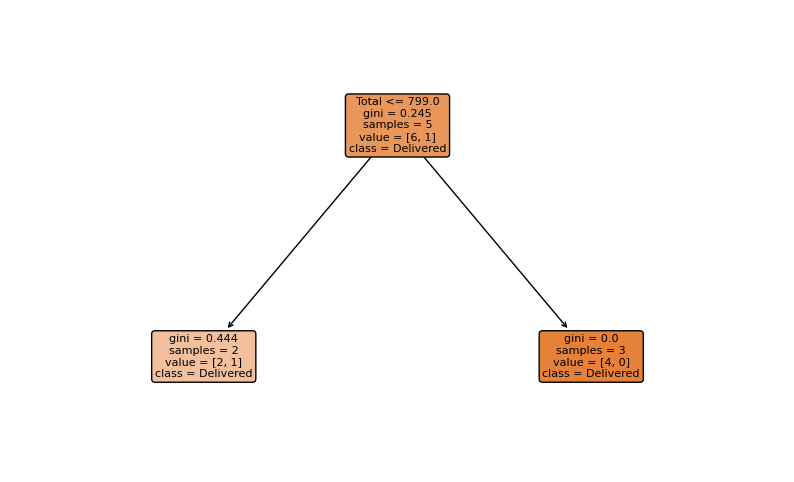

DecisionTreeClassifier(max_features='sqrt', random_state=1354754446)


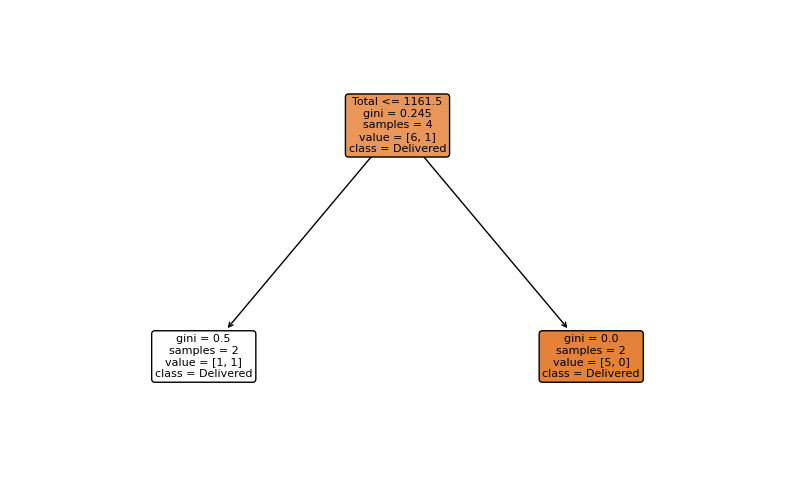

DecisionTreeClassifier(max_features='sqrt', random_state=463129187)


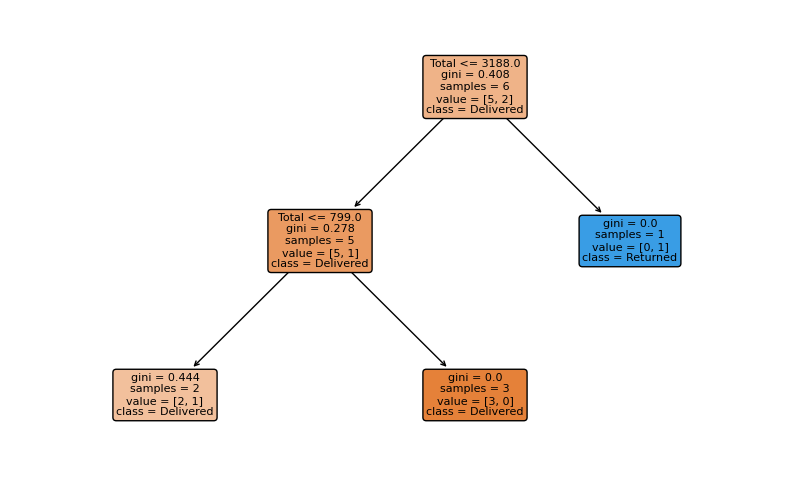

DecisionTreeClassifier(max_features='sqrt', random_state=1562125877)


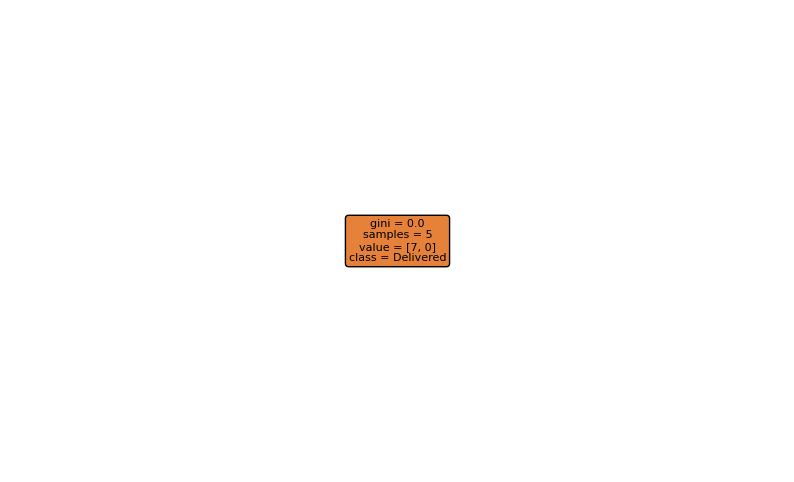

DecisionTreeClassifier(max_features='sqrt', random_state=1396067212)


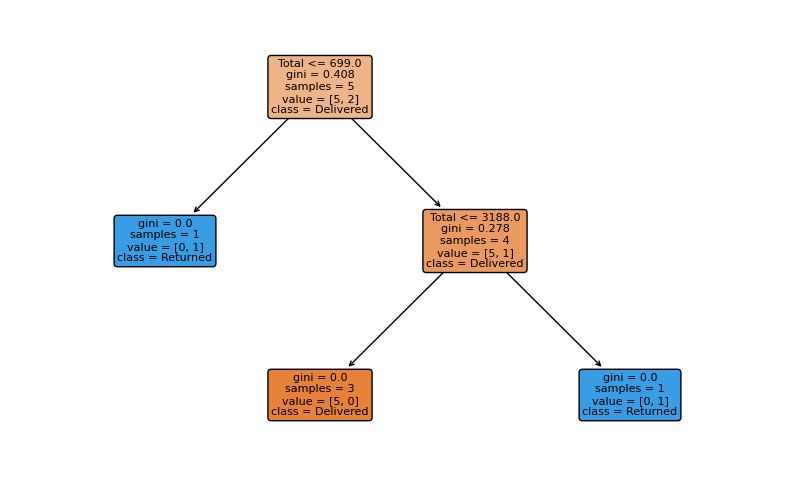

In [ ]:
# Import tree module
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# X = data[columns_using]
# y = data[['Status']]
rfc_3 = RandomForestClassifier(n_estimators=3, random_state=3)
#rfc = RandomForestClassifier()
#rfc.fit(X, y)
rfc_3.fit(X_train, y_train)
y_pred_ = rfc_10.predict(X_test)
features = X.columns.values
classes = ['Delivered', 'Returned']


for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(10,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()